# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

- avgAnnCount: Mean number of reported cases of cancer diagnosed annually
- avgDeathsPerYear: Mean number of reported mortalities due to cancer
- incidenceRate: Mean per capita (100,000) cancer diagoses
- medianIncome: Median income per county 
- popEst2015: Population of county 
- povertyPercent: Percent of populace in poverty 
- studyPerCap: Per capita number of cancer-related clinical trials per county ($\alpha$)
- MedianAge: Median age of county residents 
- MedianAgeMale: Median age of male county residents 
- MedianAgeFemale: Median age of female county residents 
- AvgHouseholdSize: Mean household size of county 
- PercentMarried: Percent of county residents who are married 
- PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high
- school 
- PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's
- degree 
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school
- diploma 
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained:
- bachelor's degree 
- PctEmployed16_Over: Percent of county residents ages 16 and over employed 
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 
- PctPrivateCoverage: Percent of county residents with private health coverage 
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public
- assistance) 
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 
- PctPublicCoverage: Percent of county residents with government-provided health coverage 
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage -lone 
- PctWhite: Percent of county residents who identify as White 
- PctBlack: Percent of county residents who identify as Black 
- PctAsian: Percent of county residents who identify as Asian 
- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or
- Asian 
- PctMarriedHouseholds: Percent of married households 
- BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd
import numpy as np

# Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [2]:
# Read the training data and targets into pandas dataframes
training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)

#### Plotting histograms of all features

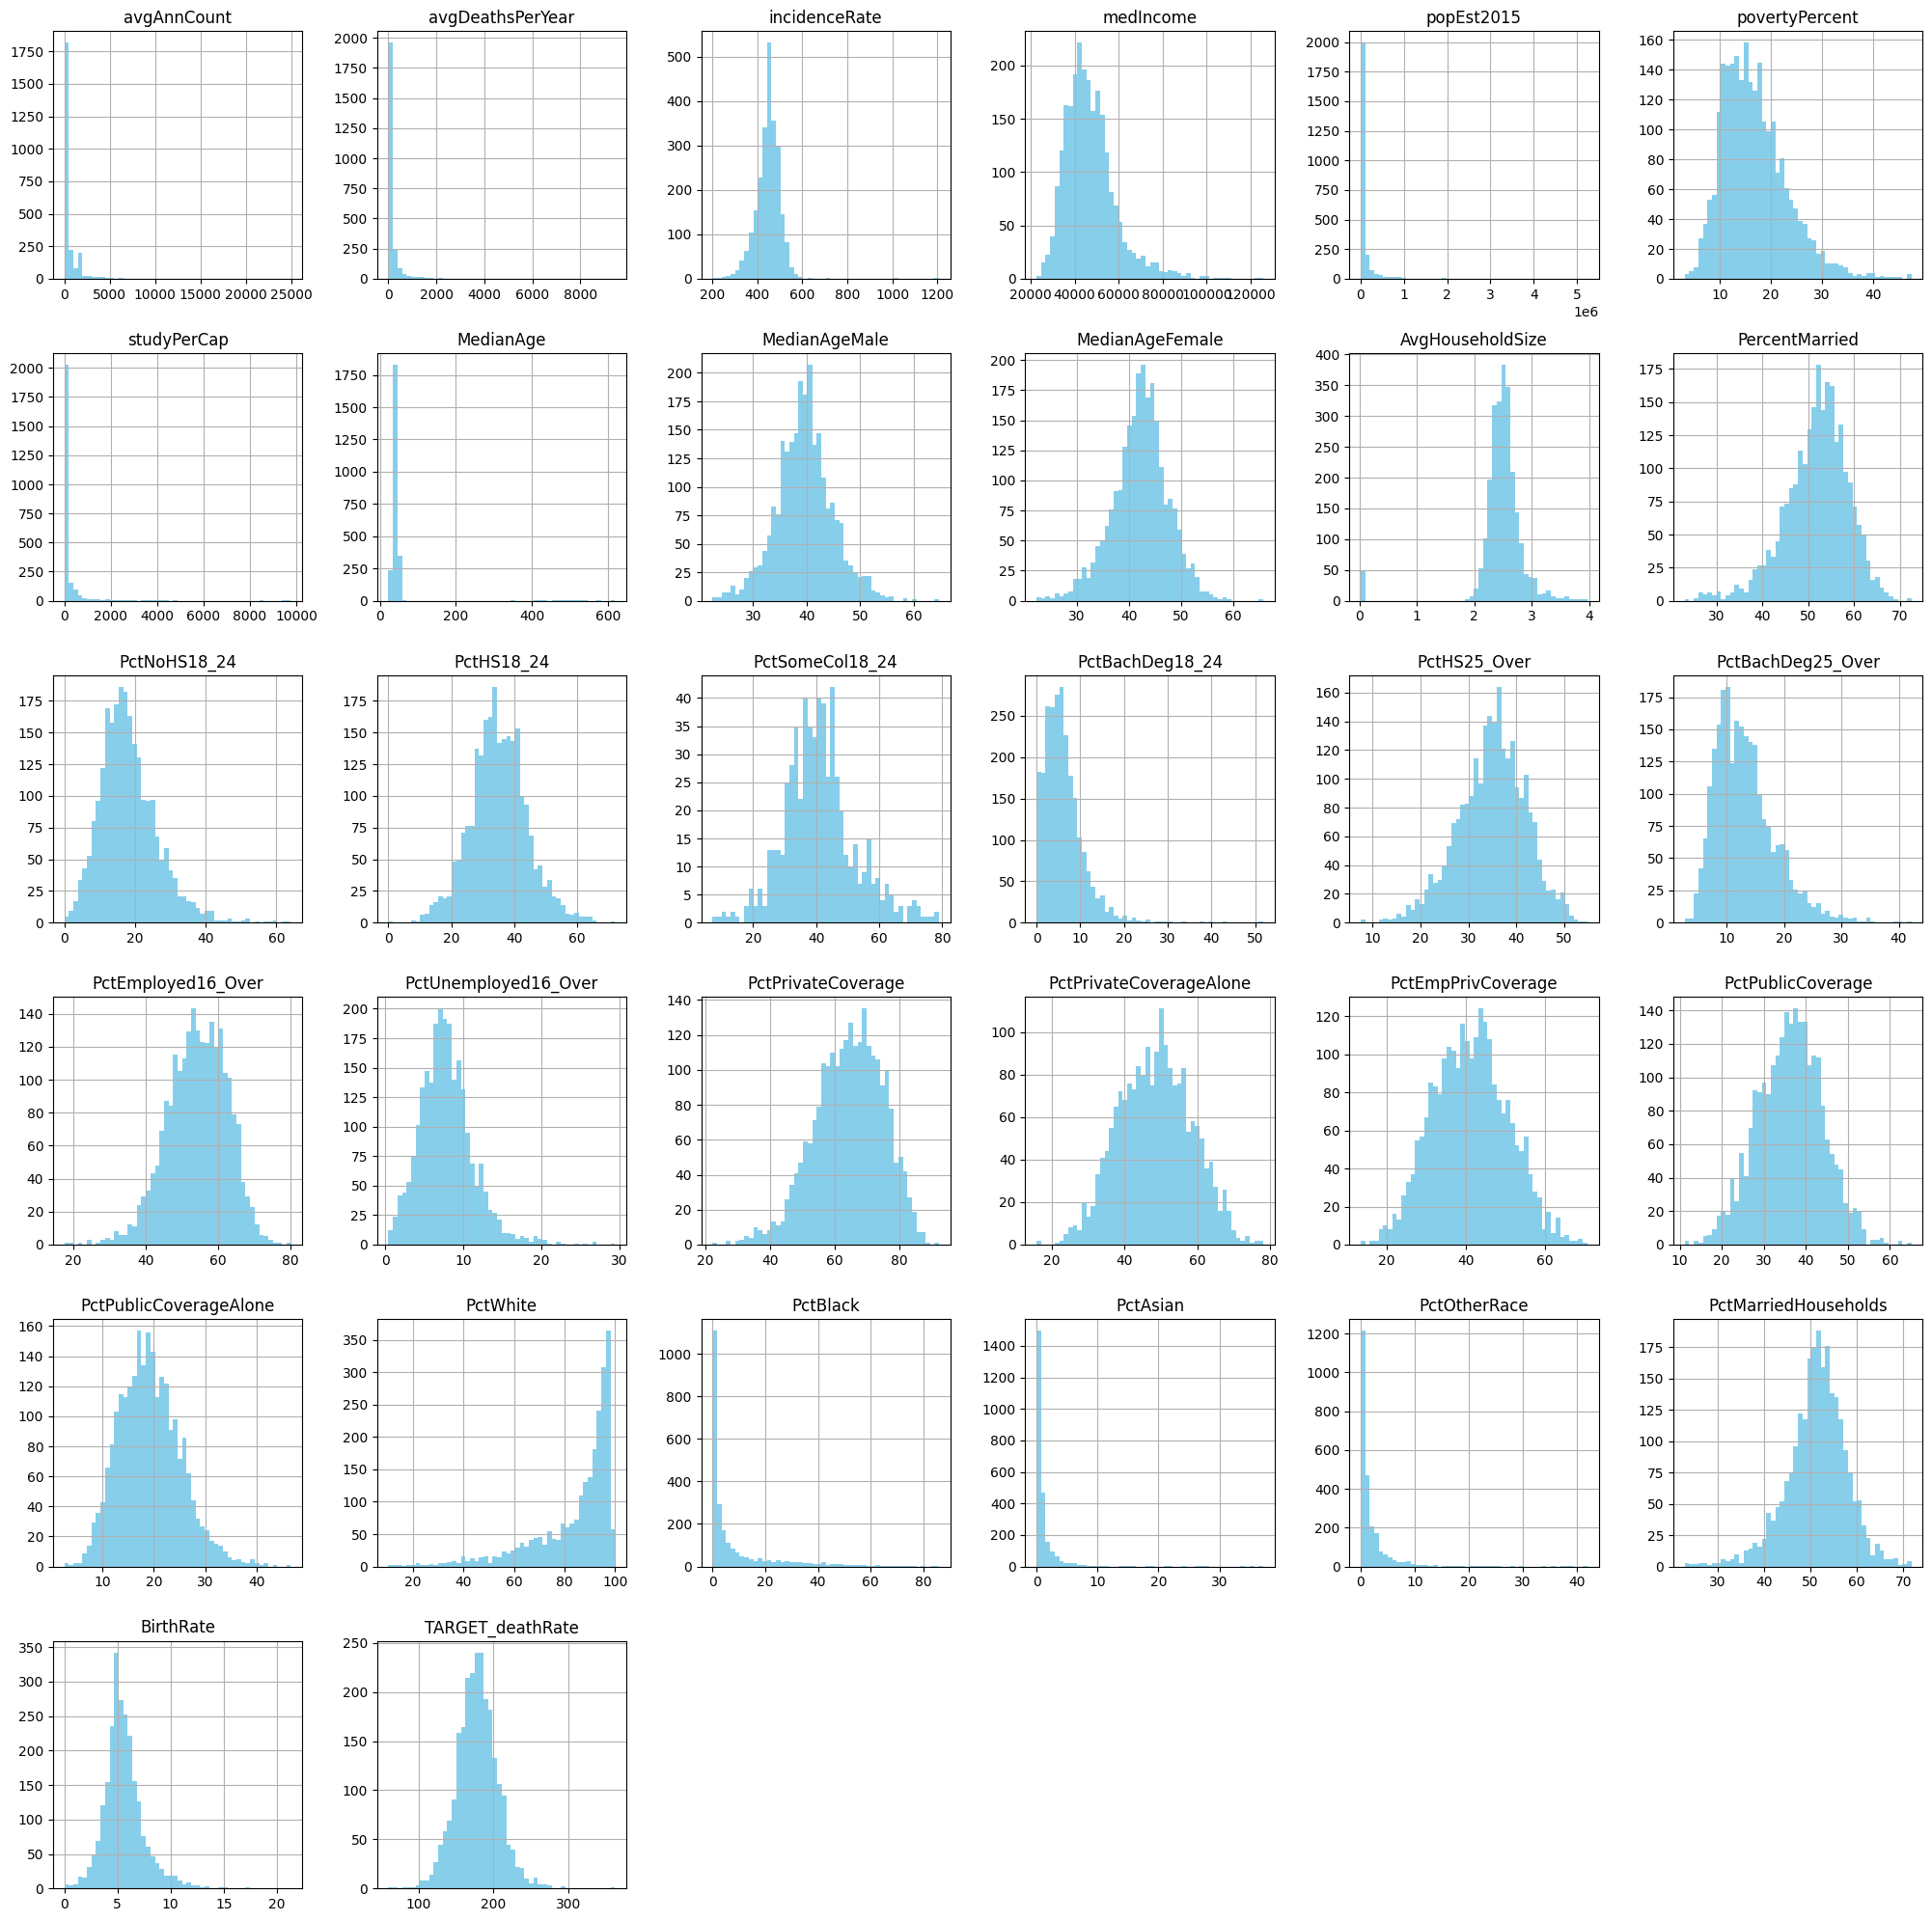

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Calculates number of bins for the histograms by taking the square root of the number of data points (comes out as 50) 
n_bins = int(np.ceil(np.sqrt(training_data.shape[0])))

# Combine target and data into new dataframe
training_data_with_targets = pd.concat([training_data, training_targets], axis=1)
# Plot histograms for each feature
training_data_with_targets.hist(bins=n_bins, figsize=(25,25), color='skyblue')
plt.show()

### Observations of unusual values

Clearly there are some interesting values above. Lets visualise what is going on here using a logarithm scale for the y axis.

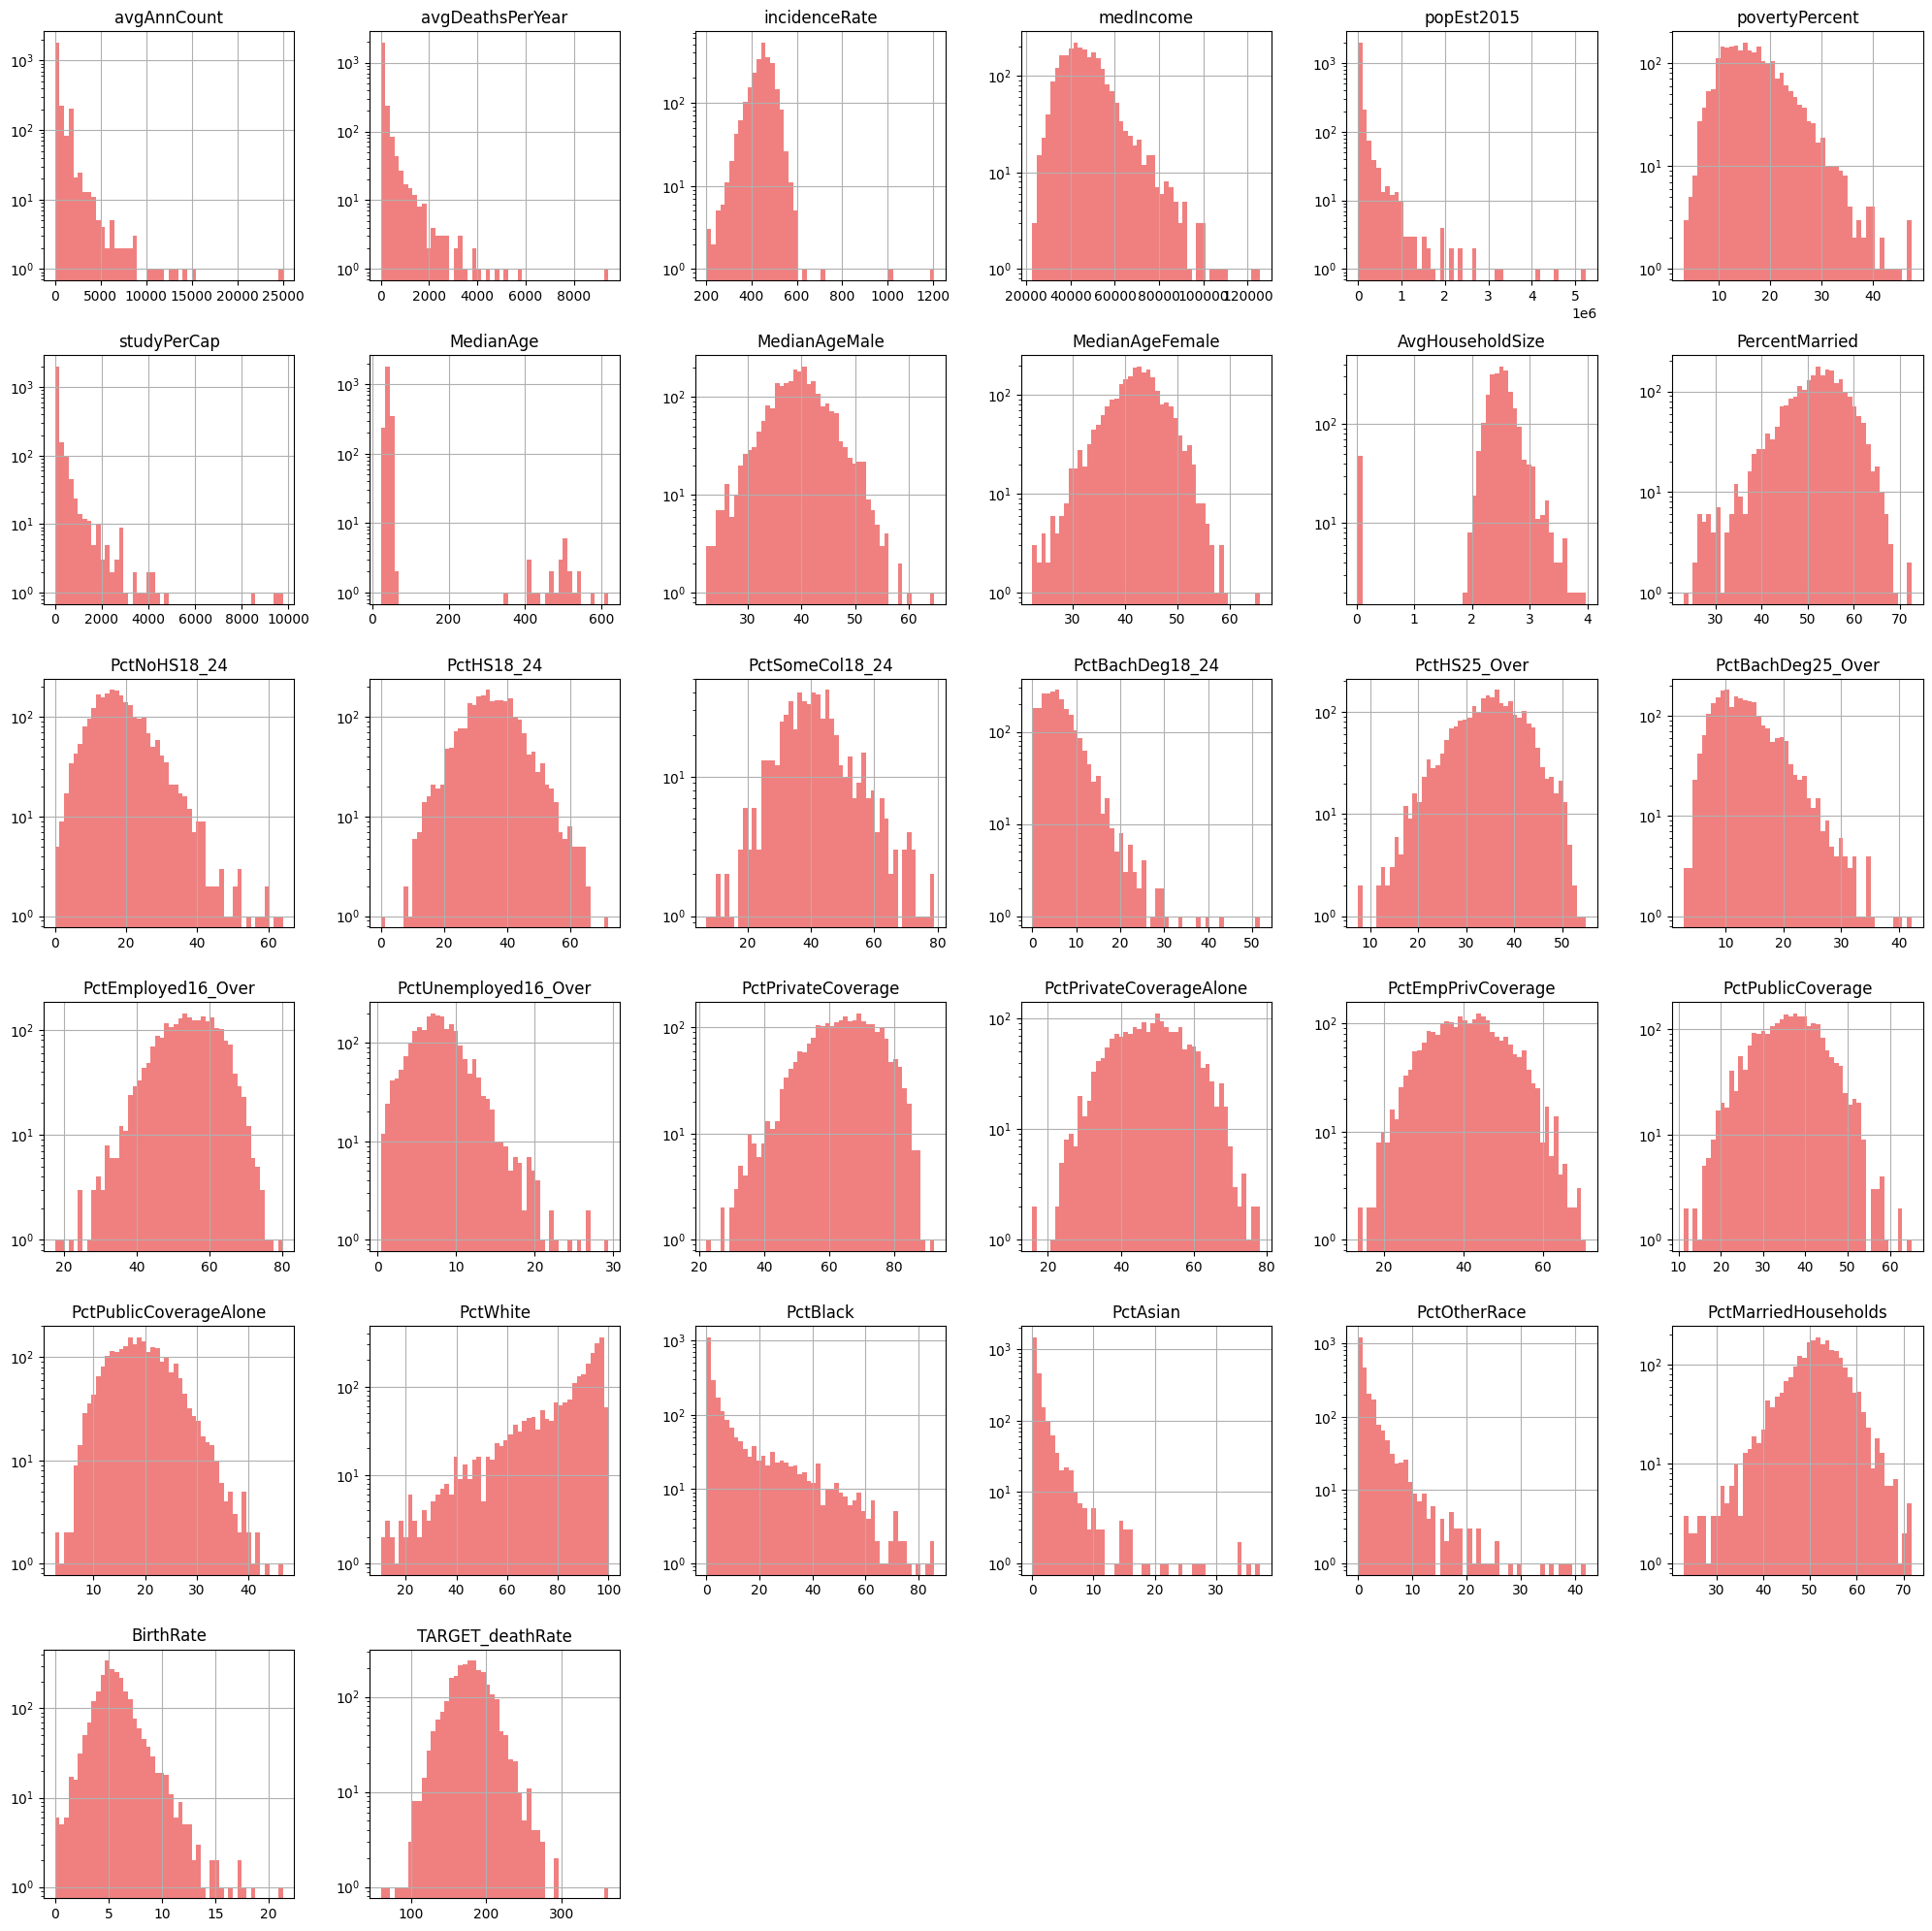

In [4]:
# Uses logarithm scale for the y-axis to make it easier to see anomalies
training_data_with_targets.hist(bins=n_bins, figsize=(25,25), log=True, color='lightcoral')
plt.show()

### Outliers

We can establish certain potential outliers based on the histograms above. We can separate these into implausible, questionable and normal.

#### Implausible values

- `MedianAge` - Scale goes up to `600`. There is something wrong. Age in `MedianAgeMale` and `MedianAgeFemale` only goes up to `60`. I question if outliers have just been multiplied by `10` accidentally.
- `AvgHouseholdSize` - There are values near `0`. The minimum value should be `1`. Definitely a problem. If values are decimals, it is possible that they have been divided by `10`.

#### Questionable values

- `avgAnnCount` - huge scale going over `20000`. Might be normal if there are large counties.
- `avgDeathsPerYear` - huge scale going over `5000`. Might be normal if there are large counties.
- `popEst2015` - values are in millions, but scale goes over `4` (million). Might be normal if there are large counties.
- `studyPerCap` - Huge scale going over `10000`. Might be normal if there are large counties.

#### Normal values

- `PctBlack`, `PctAsian`, `PctOtherRace` - Lots of empty space which suggests there is a small population of all of these. May contain outliers but completely normal.

#### Computing outliers

We can also compute the number of outliers per feature to see if we should take any future action. We can do this by looking at any value more than `3` standard deviations away from the mean. Everything here seems as we have observed previously so we will not need to take furher action than what we have already discussed.

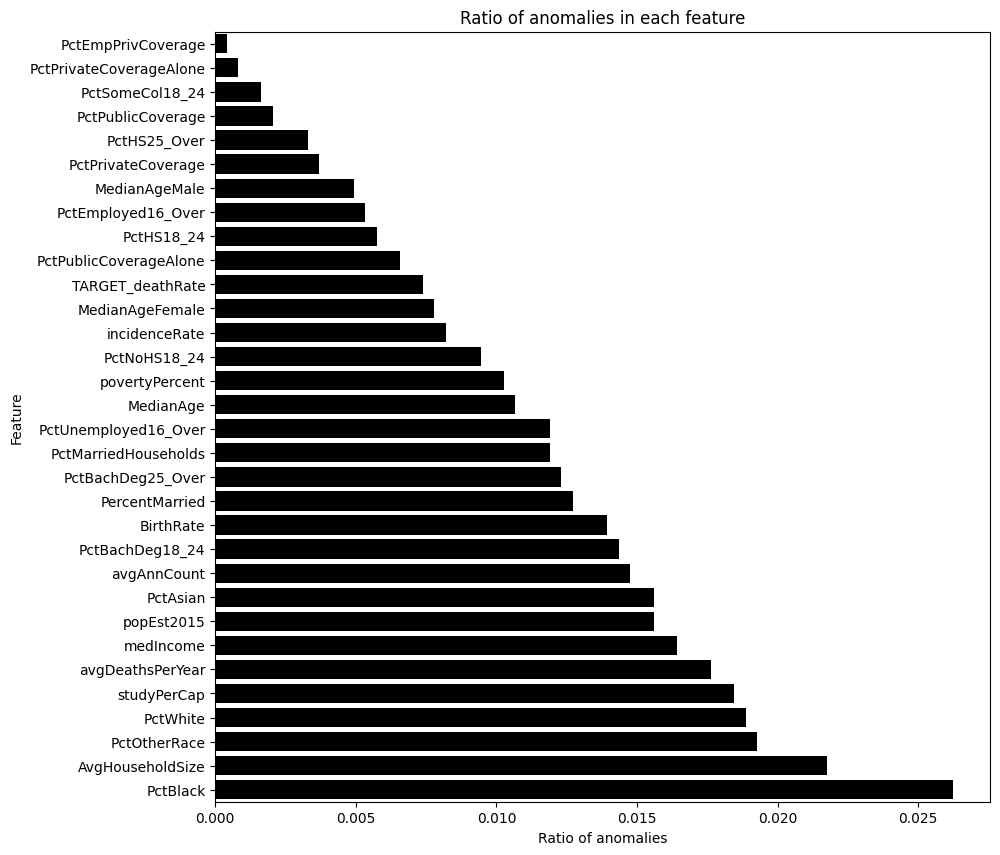

In [5]:
# Calculate standard deviation of each feature
std = training_data_with_targets.std()
outlier_upper_threshold = training_data_with_targets.mean() + 3*std
outlier_lower_threshold = training_data_with_targets.mean() - 3*std
# Calculate and plot the ratio of number of outliers to number of data in each feature
outlier_ratio = ((training_data_with_targets > outlier_upper_threshold).sum() + (training_data_with_targets < outlier_lower_threshold).sum())/training_data_with_targets.shape[0]
# Sort x axis by outlier ratio
outlier_ratio.sort_values(ascending=False, inplace=True)
outlier_ratio.plot(kind='barh', figsize=(10, 10))
# Horizontal black bars
plt.barh(outlier_ratio.index, outlier_ratio, color='black')
plt.title('Ratio of anomalies in each feature')
plt.xlabel('Ratio of anomalies')
plt.ylabel('Feature')
plt.show()

### Computing correlations with target variable

The data frame shows all correlations with the target variable. We can sort them to see the strongest correlations. Note that some of these features have negative correlations too.

In [6]:
# Compute correlations of all features with the target variable
correlations_original = training_data.corrwith(training_targets['TARGET_deathRate'])
# Sort them according the strength of correlations.
correlations_index = correlations_original.abs().sort_values(kind="quicksort", ascending=False).index
# Use index to sort correlations
correlations = correlations_original[correlations_index]
# Display correlation value from original dataframe
correlations_df = pd.DataFrame(correlations, index=correlations.index, columns=['Correlation'])
display(correlations_df)

,Correlation
PctBachDeg25_Over,-0.491411
incidenceRate,0.443983
PctPublicCoverageAlone,0.439734
medIncome,-0.416607
povertyPercent,0.413260
PctHS25_Over,0.409915
PctEmployed16_Over,-0.400317
PctPublicCoverage,0.391899
PctPrivateCoverage,-0.382786
PctUnemployed16_Over,0.362612


### Top five strongest correlations

Below is the top five features with the strongest correlations to the target variable. We can see that `PctBachDeg25_Over` has the strongest negative correlation with the target variable. This is followed by `incidenceRate` and `PctPublicCoverageAlone` which have positive correlations. `medIncome` and `povertyPercent` have negative correlations. 

| Rank | Feature | Correlation |
| -- | -- | -- |
| `1` | `PctBachDeg25_Over` | `-0.491411` |
| `2` | `incidenceRate` | `+0.443983` |
| `3` | `PctPublicCoverageAlone` | `+0.439734` |
| `4` | `medIncome` | `-0.416607` |
| `5` | `povertyPercent` | `+0.413260` |

#### Plotting correlations

Below is the scatter matrix plot of the top five features with strongest correlations to the target variable.

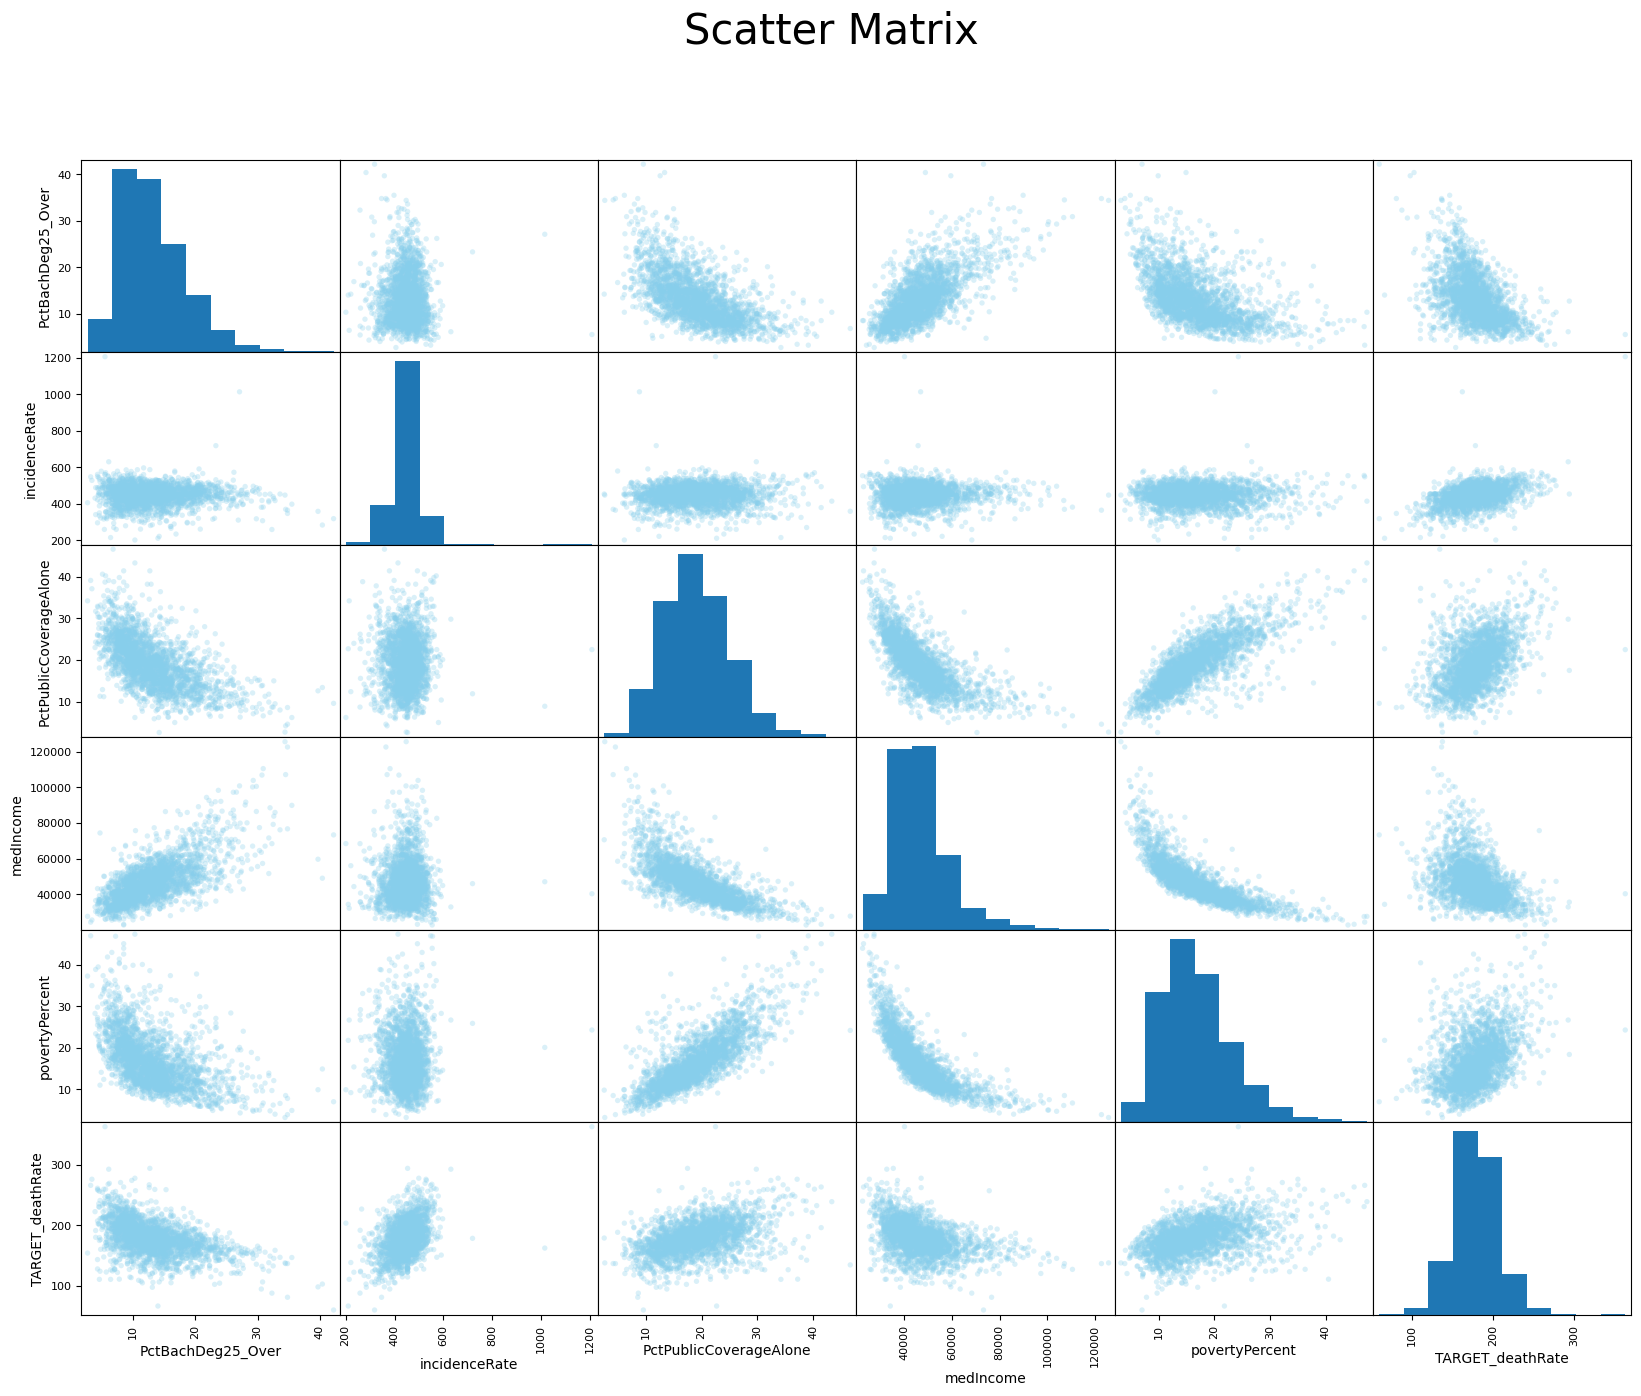

In [7]:
# Take top 5 correlations
top_5_correlations = correlations.index[:5]

# Concatenate the target variable to the training data and select correlations only
training_data_with_target_corr = pd.concat([training_data_with_targets[top_5_correlations], training_targets['TARGET_deathRate']], axis=1)
# Plot these correlations using the scatter matrix against the target variable
pd.plotting.scatter_matrix(training_data_with_target_corr, figsize=(20, 15), hist_kwds={'bins': 10}, s=60, alpha=.3, color='skyblue')
plt.suptitle('Scatter Matrix', fontsize=30)
plt.show()

#### Plotting all correlations

We can visualize all correlations using the heatmap below. What we see is that `avgAnnCount`, `avgDeathsPerYear` and `popEst2015` are highly correlated. We can use these values to produce new features. As we saw in the distributions, it is likely on their own these features won't contribute much, but combining together should be useful. This will be important to use in pre-processing. What we also see is high correlation between features relating to insurance coverage. This is also important to note. An interesting fact is that insurances also correlate with `medIncome`, `povertyPercent` and `PctMarriedHouseholds` - which is naturally expected.

Below are some other observations:
- `PctMaried` and `PctMarriedHouseholds` are highly correlated - self explanatory
- From `PctWhite` and `PctBlack` we can see it is likely that relatively more white people are married and have insurance coverage than black people. Correlations for `PctAsian` and `PctOtherRace` are very low - it will be interesting to investigate this further.
- `MedianAge` and `MedianAgeFemale` are highly correlated with each other, but neither with `MedianAge` - makes sense as we identified all the outliers previously.

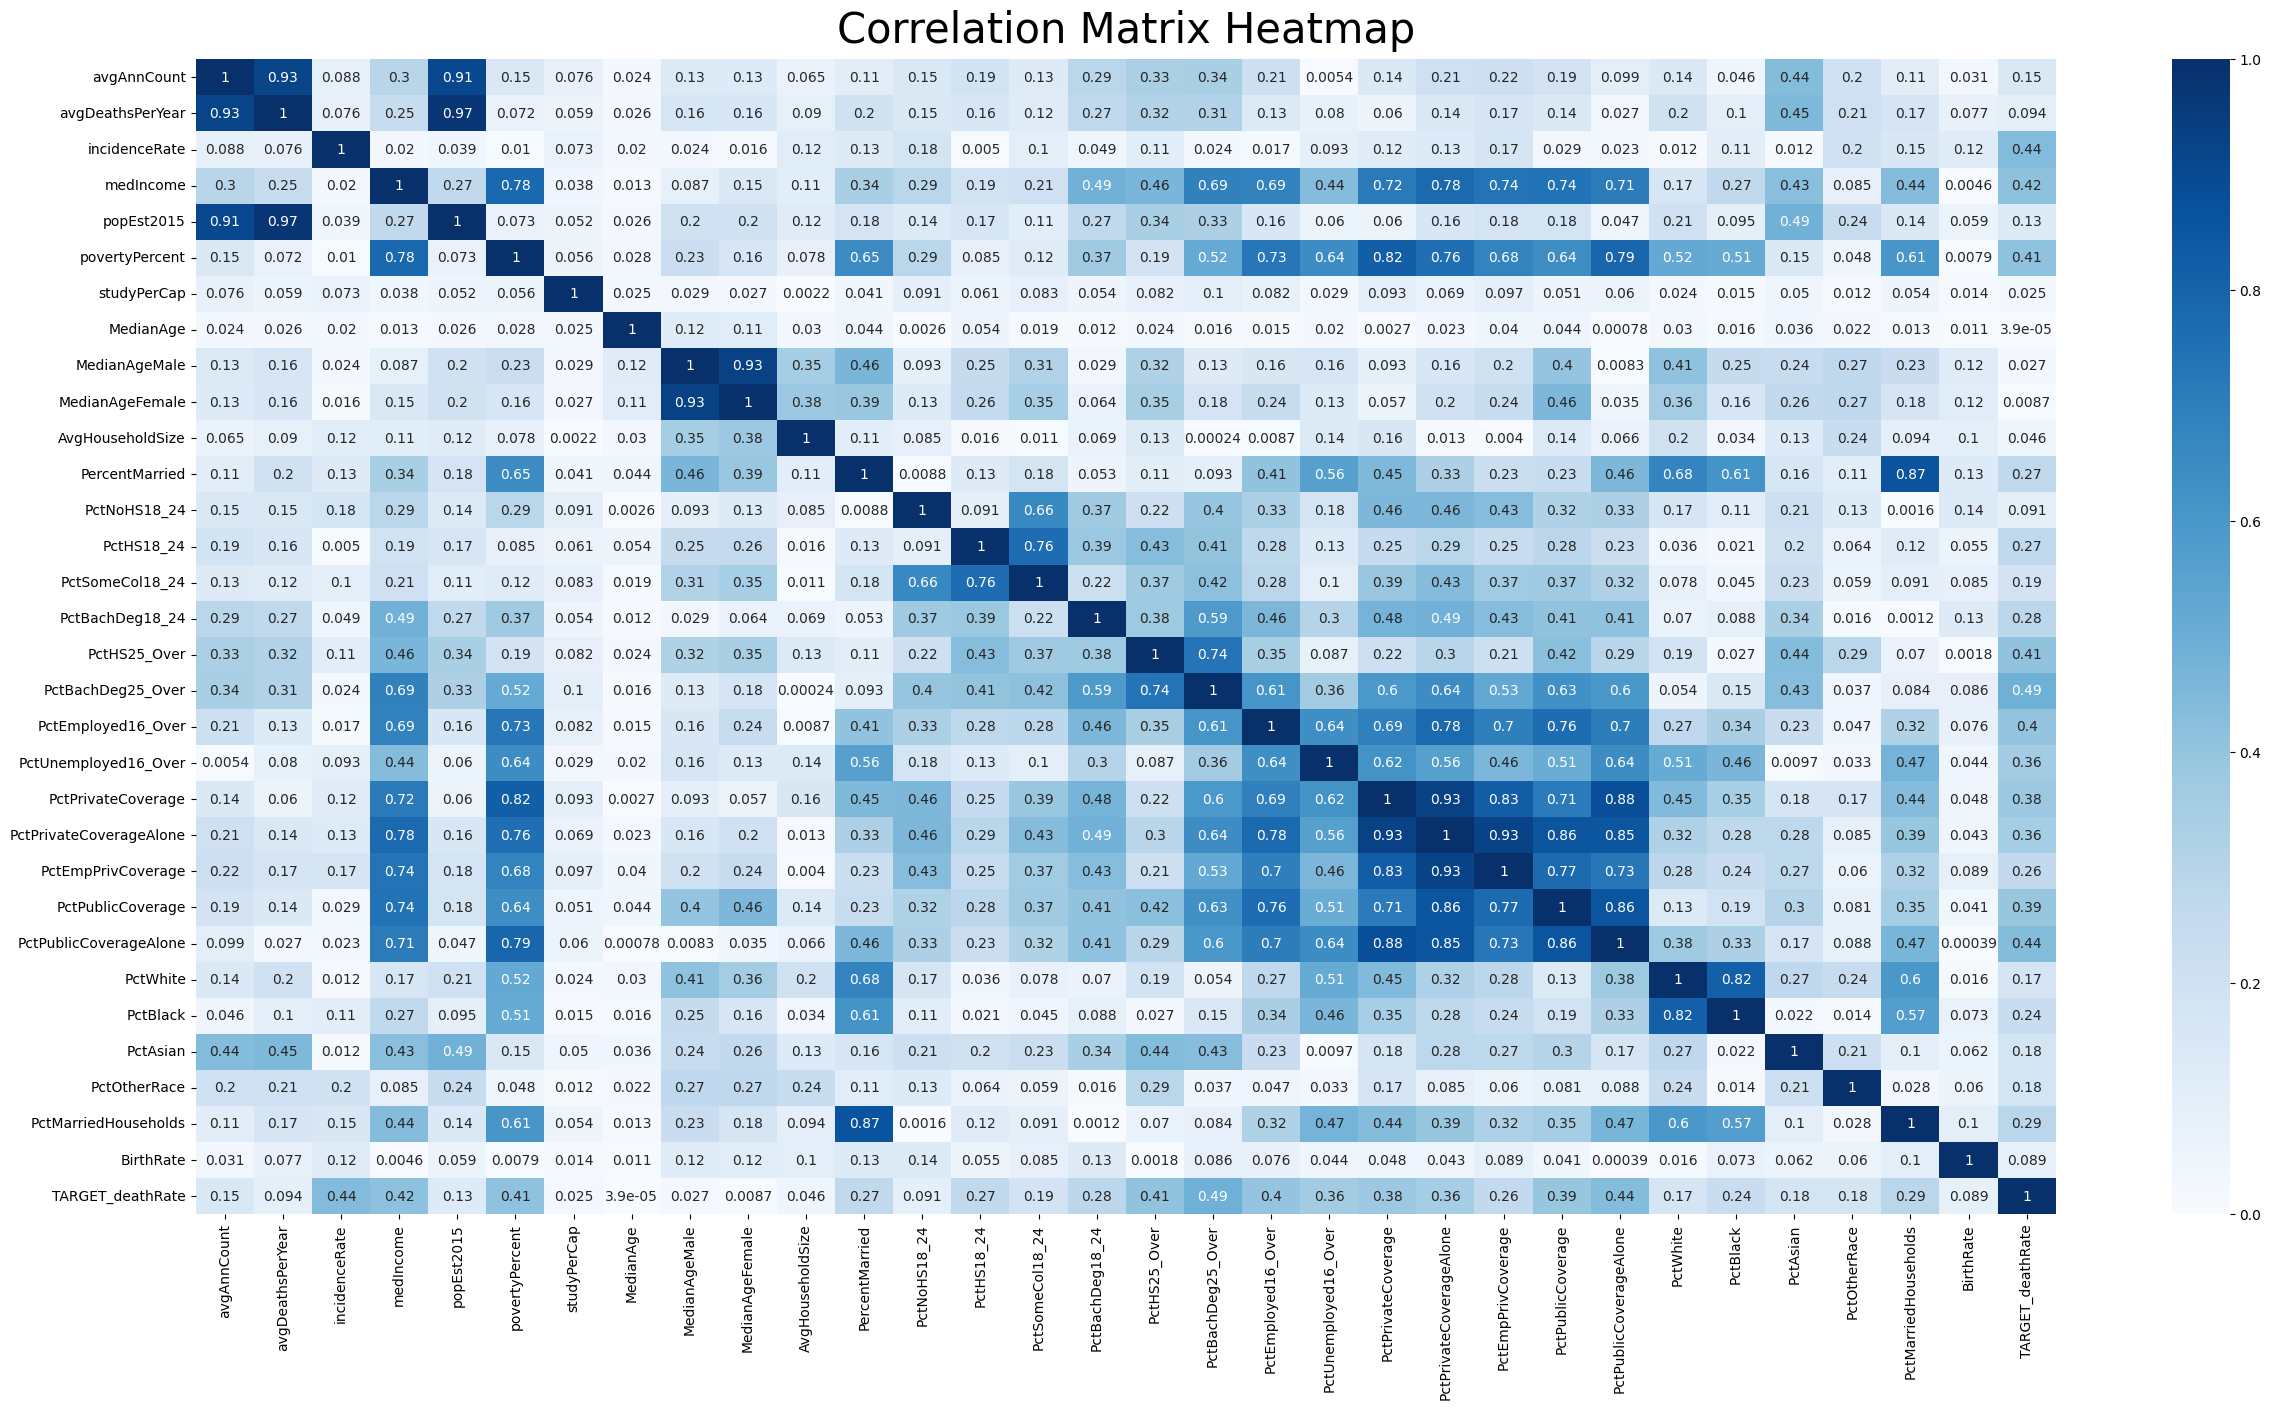

In [8]:
import seaborn as sns

# Create heatmap of all correlations
correlation=training_data_with_targets.corr().abs()
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(correlation, vmin=0, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Matrix Heatmap', fontdict={'fontsize':30}, pad=12)
plt.show()

### Comments on ethnicity

I considered using ethnicity to stratify the data, but upon further inspection I decided not to. There is a clear class imbalance, almost every country was majority white. Only `90` counties were majority black, `2` asian and `1` other. We can look into correlations and see if there are any distinctions (ignoring asian and other as the data set is far too small). What we notice is that the features in the dataset for majority black had much weaker correlation across the board. This could be due to sample size but could not be certain.

What is very interesting is that there are clear features that have correlations, which naturally make some sense too. `incidenceRate` has much higher correlation, as does `PercentMarried`. Employment, education and insurance show much lower correlations. 

If I were to go into this further, I would create separate models for the different major ethnicities, however given the limitied nature in size of the datasets this is not possible. Contextual information matters and the context of this problem would suggest it is probably important too as well. One thing we can tell is that for majority asian and other counties, these models are unlikely to be very accurate at all.

In [9]:
# Split training data to 4 separate sets based on the 4 different ethnicity types (PctWhite, PctBlack, PctAsian, PctOtherRace)
# Ethnicity chosen is the largest in the county comapred to the other 3
training_data_white = training_data_with_targets[training_data_with_targets['PctWhite'] > training_data_with_targets['PctBlack']]
training_data_white = training_data_white[training_data_white['PctWhite'] > training_data_white['PctAsian']]
training_data_white = training_data_white[training_data_white['PctWhite'] > training_data_white['PctOtherRace']]
training_data_white = training_data_white.drop(['PctBlack', 'PctAsian', 'PctOtherRace'], axis=1)

training_data_black = training_data_with_targets[training_data_with_targets['PctBlack'] > training_data_with_targets['PctWhite']]
training_data_black = training_data_black[training_data_black['PctBlack'] > training_data_black['PctAsian']]
training_data_black = training_data_black[training_data_black['PctBlack'] > training_data_black['PctOtherRace']]
training_data_black = training_data_black.drop(['PctWhite', 'PctAsian', 'PctOtherRace'], axis=1)

training_data_asian = training_data_with_targets[training_data_with_targets['PctAsian'] > training_data_with_targets['PctWhite']]
training_data_asian = training_data_asian[training_data_asian['PctAsian'] > training_data_asian['PctBlack']]
training_data_asian = training_data_asian[training_data_asian['PctAsian'] > training_data_asian['PctOtherRace']]
training_data_asian = training_data_asian.drop(['PctWhite', 'PctBlack', 'PctOtherRace'], axis=1)

training_data_other = training_data_with_targets[training_data_with_targets['PctOtherRace'] > training_data_with_targets['PctWhite']]
training_data_other = training_data_other[training_data_other['PctOtherRace'] > training_data_other['PctBlack']]
training_data_other = training_data_other[training_data_other['PctOtherRace'] > training_data_other['PctAsian']]
training_data_other = training_data_other.drop(['PctWhite', 'PctBlack', 'PctOtherRace'], axis=1)

# Print the number of rows in each dataset
print("Number of rows in training_data_white:", len(training_data_white))
print("Number of rows in training_data_black:", len(training_data_black))
print("Number of rows in training_data_asian:", len(training_data_asian))
print("Number of rows in training_data_other:", len(training_data_other))

Number of rows in training_data_white: 2345
Number of rows in training_data_black: 90
Number of rows in training_data_asian: 2
Number of rows in training_data_other: 1


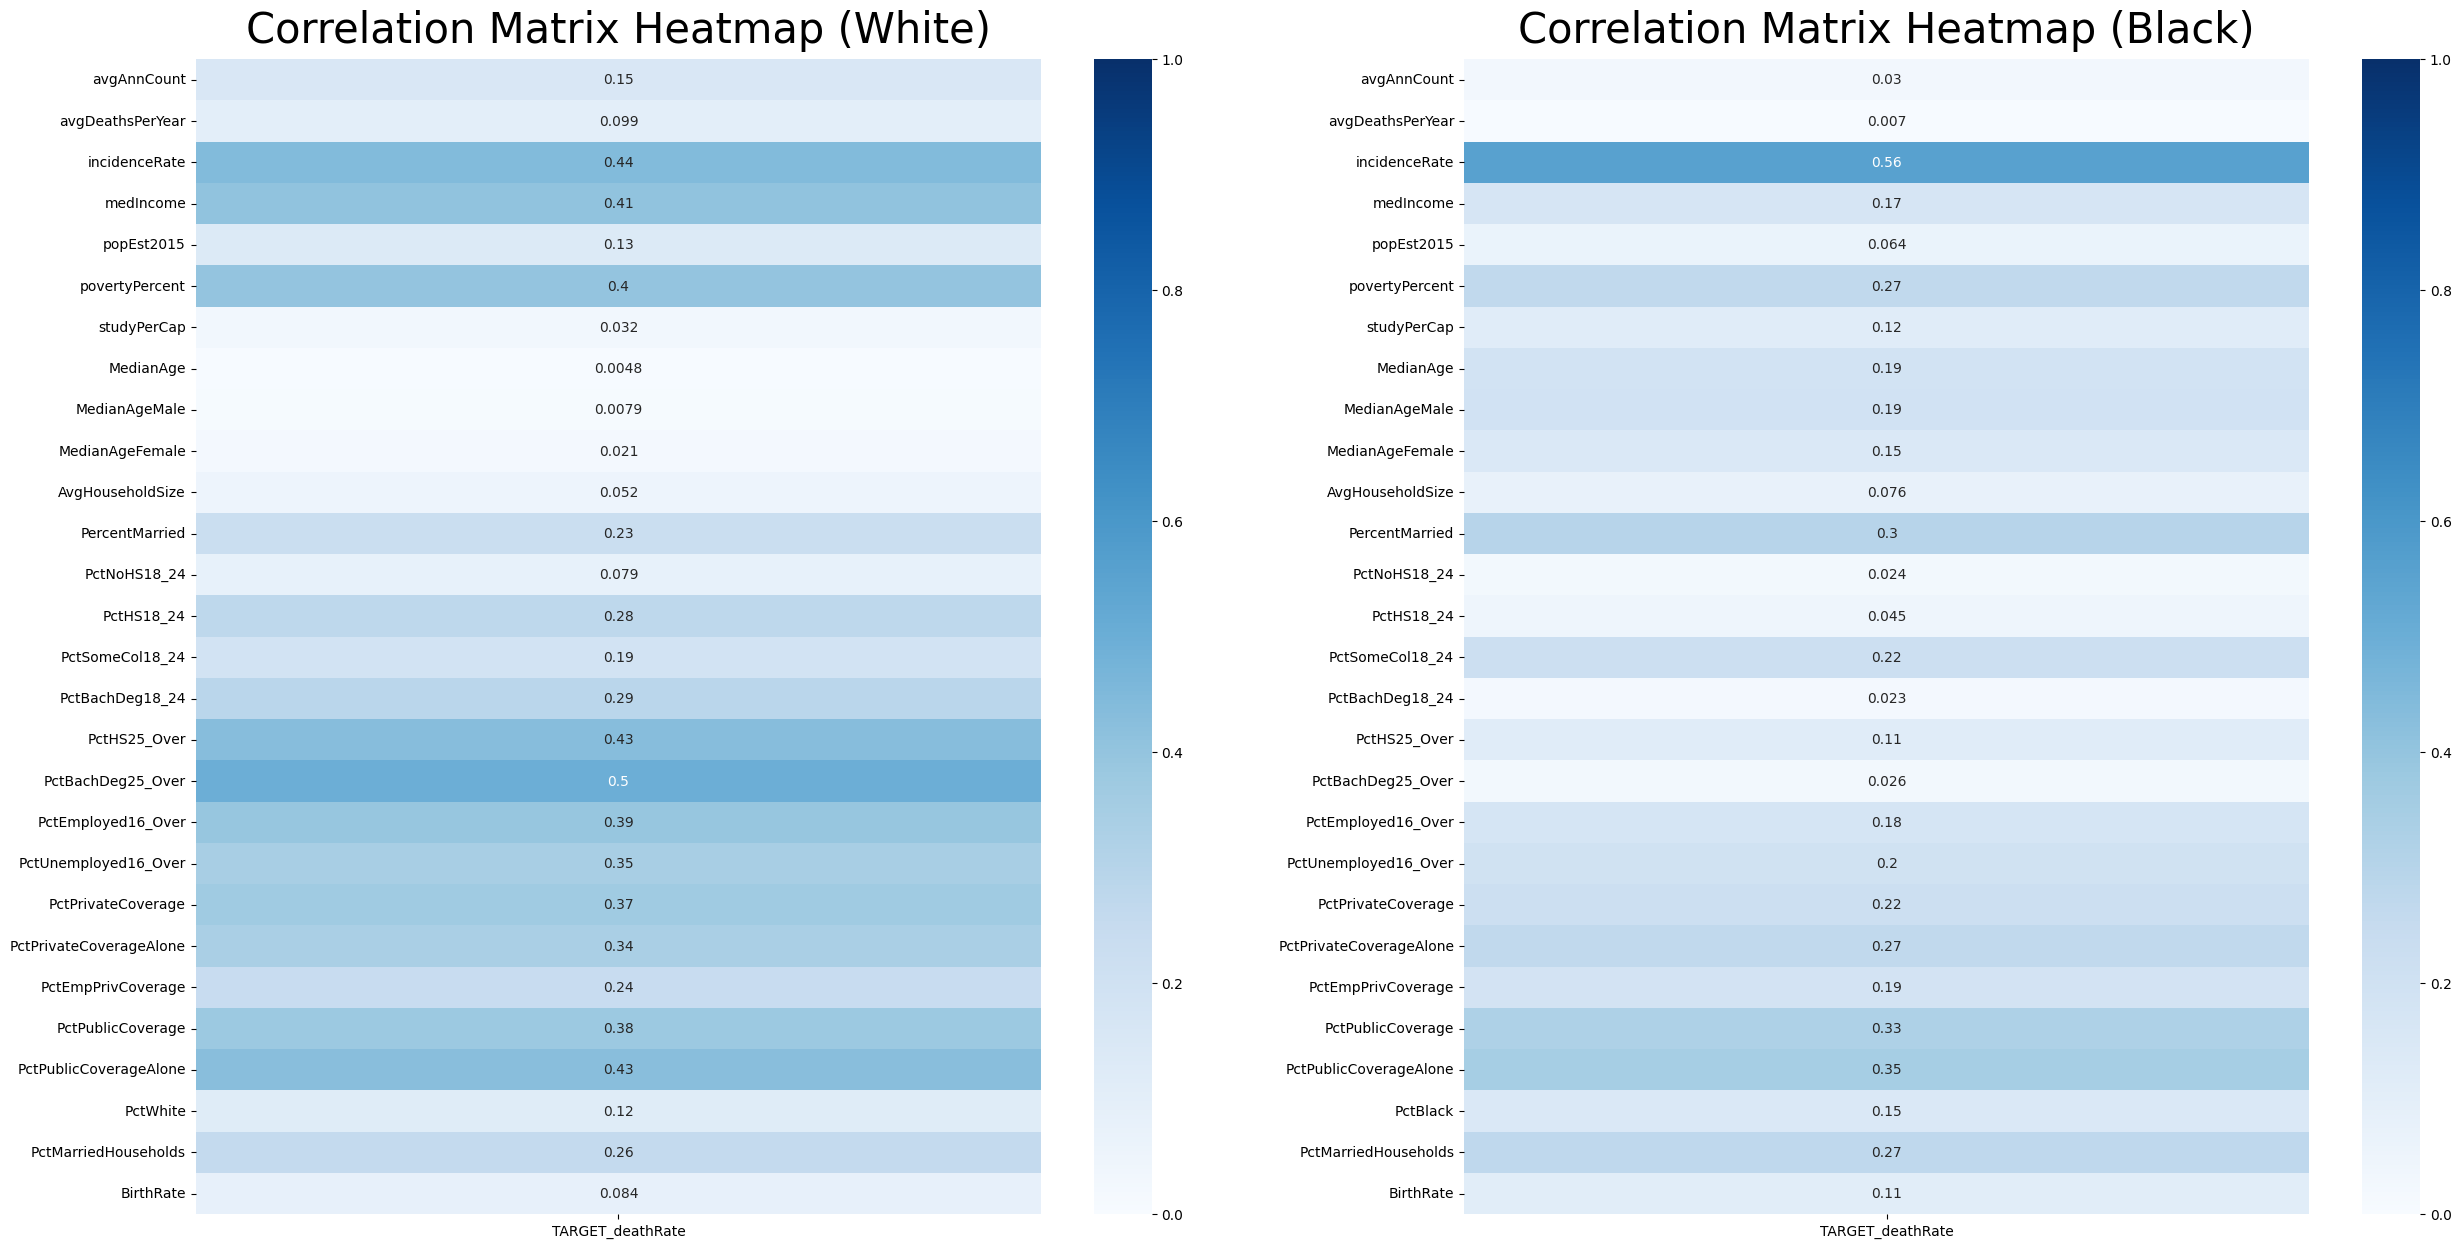

In [10]:
# Plot vertical heatmap of features with only target variable
correlation_white=training_data_white.corr().abs()
correlation_black=training_data_black.corr().abs()
# Only show correlations with target
correlation_white = correlation_white[['TARGET_deathRate']]
correlation_black = correlation_black[['TARGET_deathRate']]
# Remove final feature in both dataframes
correlation_white = correlation_white.drop(['TARGET_deathRate'], axis=0)
correlation_black = correlation_black.drop(['TARGET_deathRate'], axis=0)
# Plot single heatmap with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
heatmap_white = sns.heatmap(correlation_white, vmin=0, vmax=1, annot=True, cmap='Blues', ax=ax1)
heatmap_white.set_title('Correlation Matrix Heatmap (White)', fontdict={'fontsize':30}, pad=12)
heatmap_black = sns.heatmap(correlation_black, vmin=0, vmax=1, annot=True, cmap='Blues', ax=ax2)
heatmap_black.set_title('Correlation Matrix Heatmap (Black)', fontdict={'fontsize':30}, pad=12)
plt.show()

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

### Missing values

The first step in pre-processing the data is to get an understanding for it. Firstly, we need to check for missing values. We can do this using the `isnull()` function. We can see that there are `2431` missing values in the data set, which is a relatively small proportion of the data set. We can either drop these rows or impute them. As there are only `3` columns withmissing values we will drop them, as this is the simplest option. None of these features have extremely high correlation with the target variable, so we will not lose much information by dropping them.

In [11]:
# Check for missing data in training data
print("Total missing values:", training_data.isnull().sum().sum())

Total missing values: 2431


In [12]:
# Print features with at least 1 missing values and the number of missing values
missing_values = training_data.isnull().sum()[training_data.isnull().sum() > 0]
# convert missing_values to datagframe and display it
missing_values = pd.DataFrame({
  "Feature": missing_values.index,
  "Total Missing Values": missing_values.values,
  "% Missing": np.round(missing_values.values/training_data.shape[0]*100, 0).astype(int)
}, index=None)
display(missing_values)

,Feature,Total Missing Values,% Missing
0,PctSomeCol18_24,1829,75
1,PctEmployed16_Over,119,5
2,PctPrivateCoverageAlone,483,20


### Computing new features

Based on the correlations computed in exercise `1`, and the large values for certain features, we can produce new, more meaningful features. We identified that these values had outliers but were normal and since they were highly correlated, it would be possible to create new features derived from these.

Instead of using the average deaths and cases per year, we can use the population estimate to produce new features as described below - `deathPerCounty`, `casesPerCounty`, `deathRate`, `studyPerCap`. Later we will see that `casesPerCounty` and `studyPerCountry` are not as useful as the other features, but better than some of the original features.

In [13]:
from sklearn.base import BaseEstimator

# Add new features to the data
class AddNewFeatures(BaseEstimator):
  def __init__(self):
    return None
    
  def fit(self, X, y=None):
    # We don't transform the target values here
    return self
  
  def transform(self, X, y=None):
    x = X.copy(deep=True)
    # Create new column, deathPerCounty = avgDeathsPerYear / popEst2015
    x['deathPerCounty'] = x['avgDeathsPerYear'] / x['popEst2015']
    # Create new colulmn, casesPerCounty = avgAnnCount / popEst2015
    x['casesPerCounty'] = x['avgAnnCount'] / x['popEst2015']
    # Create new column, deathRate = avgDeathsPerYear / avgAnnCount
    x['deathRate'] = x['avgDeathsPerYear'] / x['avgAnnCount']
    # Create new column, studyPerCounty = studyPerCap / popEst2015
    x['studyPerCounty'] = x['studyPerCap'] / x['popEst2015']
    return x

### Dropping columns

We can also drop some of the features that are not as useful. Firstly, we need to drop features with missing values as discussed in Exercise 1. I tested removing the `PctEmployed16_Over` column, but keeping it seems to produce better results. Then we drop columns used to produce the new features above.

In [14]:
columns_to_drop = ['PctSomeCol18_24', 'PctPrivateCoverageAlone', 'avgAnnCount', 'avgDeathsPerYear', 'studyPerCap', 'popEst2015']

# Remove unwanted features from the data
class DropColumns(BaseEstimator):
  def __init__(self, columns_to_drop):
    self.col = columns_to_drop
    
  def fit(self, X, y=None):
    # We don't transform the target values here
    return self
  
  def transform(self, X, y=None):
    x = X.copy(deep=True)
    x.drop(self.col, axis=1, inplace=True)
    return x

### Removing outliers

As discussed in exercise `1`, there are some outliers in the data set. We can remove these using the standard deviation method, where we remove any values that are more than `3` standard deviations from the mean. We also explicitly remove implausible values. We will only remove values which are inherently implausible - `MedianAge` greater than `120` and `AvgHouseholdSize` smaller than `1`.

I considered adding criteria to transform outliers in all features but decided against this as it would be too restrictive, and the standard deviation method should do a lot of this work for us.

One downside is we could be removing completely plausible outliers, which are just much larger or smaller than others. However, this is unlikely to be a problem as we are only removing a small proportion of the data - anything more than `3` standard deviations from the mean is only `0.3%` of the data.

In [15]:
class OutlierRemover(BaseEstimator):
  ''' 
  Removes implausible from the following columns (as identified in the previous section):
  1. MedianAge 
  2. AvgHouseholdSize
  '''
  def __init__(self):
    return None
    
  def fit(self, X, y=None):
    # We don't transform the target values here
    return self
  
  # Imputes outliers with median values
  def transform(self, X, y=None):
    # Deep copy
    x = X.copy(deep=True)

    # Multiply all MedianAge values > 120 by 0.1
    x.loc[x['MedianAge'] > 120, 'MedianAge'] = x['MedianAge'] * 0.1
    # Multiply all AvgHouseholdSize values < 1 by 10
    x.loc[x['AvgHouseholdSize'] < 0.01, 'AvgHouseholdSize'] = x['AvgHouseholdSize'].median()
        
    for col in x.columns:
      # All features with Pct in the name which have values < 0 or > 100 should be imputed with median values
      if 'Pct' in col:
        x.loc[x[col] < 0, col] = x[col].median()
        x.loc[x[col] > 100, col] = x[col].median()
      # Impute values 3 standard deviations away from the mean
      mean = x[col].mean()
      sd = x[col].std()
      x.loc[(x[col] > mean + 3*sd) | (x[col] < mean - 3*sd), col] = x[col].median()
    return x

## Creating pipeline

Using the classes above, we can create a pipeilne. Firstly we get the headings of the columns we would like. Then we add the new features, drop the unwanted columns, remove outliers impute the remaining missing values and finally scale values so that they will be more meaningful.

I am using an iterative imputer instead of the simple imputer as it is more accurate. It uses a model to predict the missing values, and then uses the predicted values to predict the next missing value. This is repeated until all missing values are imputed. This is more accurate than the simple imputer as it takes into account the relationships between features. `BayesianRidge` regression is used as the model.

Values with the median of the non-missing values in the same feature. This can be a simple and effective approach when the distribution of the values in a feature is approximately symmetric and there are not too many missing values - this is more appropriate when removing outliers as we have done above.

However, median imputation has some limitations as a method for handling missing values. One limitation is that it does not take into account the relationships between features, and so it may not accurately capture the underlying structure of the data. In contrast, `BayesianRidge` is a linear regression model that estimates the parameters of a linear relationship between the features and the target variable, and so it may be more effective at capturing the underlying structure of the data.

Additionally, `BayesianRidge` provides uncertainty estimates for the model parameters, which can be useful for making predictions on new data. Median imputation does not provide any uncertainty estimates, and so it may be more difficult to assess the uncertainty of predictions made using this method.

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler

training_data_headings = training_data.columns
training_data_headings = training_data_headings.append(pd.Index(['deathPerCounty', 'casesPerCounty', 'deathRate', 'studyPerCounty']))
training_data_headings = training_data_headings.drop(columns_to_drop)

# Create a pipeline to pre-process the training data
pipeline_original = Pipeline([
  # add new features
  ('add_new_features', AddNewFeatures()),
  # drop unwanted and low scoring features
  ('drop_columns', DropColumns(columns_to_drop)),
  # remove outliers
  ('outlier_remover', OutlierRemover()),
  # impute missing values
  ('imputer', IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=41)),
  # scale the data
  ('std_scaler', StandardScaler())
])

### Pre-processing the data

Finally, we can fit and transform our entire training data and set the headings we will use for the pre-processed data.

In [17]:
# Pre-process the training data
train_processed = pipeline_original.fit_transform(training_data)

### Feature selection

I decided to use the `SelectKBest` method to select the best features. This uses a statistical test to select the best features. I used the f_regression test as this is designed for regression problems. Initially, I used the default value of `k=10`, which means it will select the 10 best features. But I found that models had much worse accuracy. Thus, instead I opted for removing anything with a score less than `1`. This way we keep all the features that give us useful information and remove those without.

Setting a variance threshold was not as important, as our data does not have many values in features which are the same, so we ignored this.

We can see that the custom features relating to death are by far the most informative features. There are `4` features which produce scores less than 1 which are removed. `casesPerCounty` was slightly better than some of the original features, so I decided to keep it, but `studyPerCounty` was not and removed.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression

# Perform feature selection using Information Gain
selector = SelectKBest(f_regression)
selector.fit(train_processed, np.ravel(training_targets))

# Get the raw p-values for each feature, and transform from p-values into scores (descending)
scores = -np.log10(selector.pvalues_)

# Create new dataframe with headings and scores
scores_df = pd.DataFrame(scores, index=training_data_headings, columns=['score'])
scores_df.sort_values(by='score', ascending=False, inplace=True)
display(scores_df)

,score
deathPerCounty,179.437101
deathRate,151.713251
PctBachDeg25_Over,120.093490
PctPublicCoverageAlone,113.124092
incidenceRate,105.512162
medIncome,97.454388
PctEmployed16_Over,95.737184
PctPublicCoverage,95.034901
PctHS25_Over,91.431936
povertyPercent,91.086544


#### Dropping features

We can now drop the features we do not want to use. We can see that the features we have dropped are not very useful. Instead of directly selecting features, we drop ones which we do not want.

In [19]:
# Decide which features to drop
features_to_drop = scores_df[scores_df['score'] < 1].index
print("Additional features to drop:")
for feature in features_to_drop:
  print(f"- {feature}")

# Remove features from training_data_headings
headings = training_data_headings.drop(features_to_drop)

# Add features in columns_to_drop to features_to_drop if not already
for feature in columns_to_drop:
  if feature not in features_to_drop:
    features_to_drop = features_to_drop.append(pd.Index([feature]))

Additional features to drop:
- studyPerCounty
- MedianAgeMale
- MedianAge
- MedianAgeFemale


## Final pipeline

Using all the above results, we can create a final pipeline which will pre-process the data. The reason we could not just create one pipeline is that feature selection requires out data to be propreccessed first. Now the only difference is as we have removed the features which initially contained outliers anyway, we do not need to explicitly remove outliers again.

In [20]:
from sklearn.decomposition import PCA

# Create a pipeline to pre-process the training data and perform feature selection
pipeline_feature_selection = Pipeline([
  # adds new features
  ('add_new_features', AddNewFeatures()),
  # drops columns_to_drop and features_to_drop
  ('drop_columns', DropColumns(features_to_drop)),
  # imputes missing values
  ('imputer', IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=41)),
  # scales the data
  ('std_scaler', StandardScaler())
  # performs dimensionality reduction with PCA
  #, ('pca', PCA(n_components=2))
])

## Splitting the data

I considered using stratified sampling but decided that as I did not identify class imbalance as a huge issue; thus, I decided to split the data normally.

Later on, you will see the models produced incredibly good results. I tested below will larger test sets and even at `50%` the model was performing well. This is a 'little' extreme, so I settled with the standard `20%`.

In [21]:
# Split the training data into training and test sets
X_train, Y_test, X_targets, Y_targets = train_test_split(training_data, training_targets, test_size=0.2, random_state=41)

# Pre-process the training data
X_train = pipeline_feature_selection.fit_transform(X_train)
Y_test = pipeline_feature_selection.transform(Y_test)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_targets.shape)
print("Training targets shape:", Y_test.shape)
print("Test targets shape:", Y_targets.shape)

Training data shape: (1950, 25)
Test data shape: (1950, 1)
Training targets shape: (488, 25)
Test targets shape: (488, 1)


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


## Linear regression

We can now fit a linear regression model to the data. As there are no hyperparameters to tune this is straightforward. As we are not using any regularisation, nor must we perform cross validation.

In [22]:
from sklearn.linear_model import LinearRegression

# Fit OLS regression models to the pre-processed data using the Ordinary least squares model.
ols_model = LinearRegression()

# Fit the model to the training data using cross validation
ols_model.fit(X_train, X_targets)

# Make predictions using the model
ols_predictions = ols_model.predict(Y_test)

### Choice of metrics

To perform quantitive analysis, we need to choose some metrics. I decided to use the root mean squared error (RMSE) and R2 score. These are regression metrics, and so are appropriate for this problem.

#### Goals

In general, the goal of model fitting is to find a balance between underfitting and overfitting. Underfitting occurs when the model is too simple and is not able to capture the complexity of the data, while overfitting occurs when the model is too complex and is sensitive to noise in the data. To avoid underfitting and overfitting, we can see how these metrics perform, especially against other models. We can also compare metrics from cross validation against the test set to see if the model is overfitting.

#### RMSE

This metric is really simple. It is the square root of the mean of the squared errors. The lower the RMSE the better. This is because it is a measure of the error, and so the lower the error the better. It is easy to quantify as it tells us how far off the predictions are from the actual values.

The RMSE is `12.7` which is very low. This means that the model is very accurate. Compared to the cross validation scores on the training set, we can see that there is a small difference compared to the test set. This is a very good result, and we can see that the model is not overfitting.

Note that I would have rounded all the RMSE values to `2` decimal places, but I have left them as they are to make it easier to compare the results, as they are very similar to each other.

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# RMSE cross validation on training set
ols_rmse_cv_scores = np.sqrt(-cross_val_score(ols_model, X_train, X_targets, cv=10, scoring="neg_mean_squared_error"))
print("OLS RMSE cross validation score:", ols_rmse_cv_scores.mean())

# RMSE score on test set
ols_rmse_scores = np.sqrt(mean_squared_error(Y_targets, ols_predictions))
print("OLS RMSE test score:", ols_rmse_scores.mean())

OLS RMSE cross validation score: 13.693899713494279
OLS RMSE test score: 12.736062834751293


#### R2

This measure is a measure of how well a model fits the data. It is defined as the proportion of the variance in the target variable that is explained by the model.

The R2 score ranges from `0` to `1`, where a value of `0` indicates that the model explains none of the variance in the target variable, and a value of `1` indicates that the model explains all of the variance in the target variable. A higher R2 score indicates a better fit of the model to the data.

This does imply we must make certain assumptions about the data hold, such as the independence of the observations and the homoscedasticity of the errors. If this is not true, the R2 score may not accurately reflect the model's fit to the data. 

Clearly, OLS has produced a very good result. With the `0.77` R2 score, it explains `77%` of the variance in the target variable. Compared to the cross validation score, we can actually see it performs better. Combined with the RMSE result, this suggests our model is not overfitting.

In [24]:
from sklearn.metrics import r2_score

# R2 cross validation on training set
ols_r2_cv_scores = cross_val_score(ols_model, X_train, X_targets, cv=10, scoring="r2")
print("OLS R2 cross validation score:", ols_r2_cv_scores.mean())

# R2 score on test set
ols_r2_scores = r2_score(Y_targets, ols_predictions)
print("OLS R2 test score:", ols_r2_scores.mean())

OLS R2 cross validation score: 0.7526137440596983
OLS R2 test score: 0.7653807210150735


#### Evaluating OLS regression model

The scatter plot below shows the predicted values against the actual values. The dotted line shows what a perfect model would look like. Clearly, this model performs really well. It does become less accurate when the target variable is larger, but this is to be expected. The model is not perfect, but it is very good.

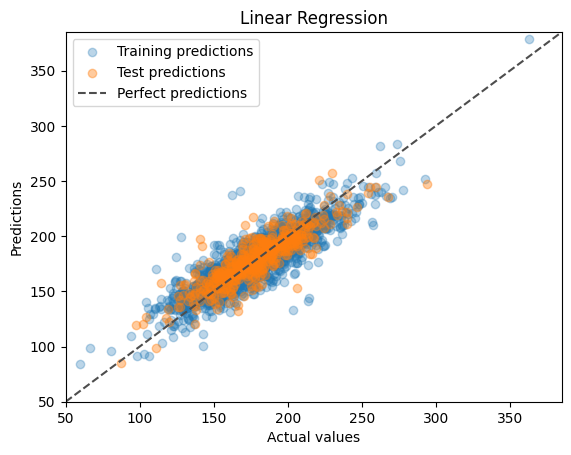

In [25]:
# Created function to be reused throughout the notebook
def plot_results(x, y, model, predictions, title, xlim, ylim):
  # Plot the predictions vs the actual values
  plt.scatter(x, model.predict(X_train), alpha=0.3)
  # Plot training predictions
  plt.scatter(y, predictions, alpha=0.4)
  # show line for perfect predictions
  plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")
  # Limit the range of the plot
  plt.xlim(xlim, ylim)
  plt.ylim(xlim, ylim)
  plt.title(title)
  plt.xlabel("Actual values")
  plt.ylabel("Predictions")
  # Legend
  plt.legend(["Training predictions", "Test predictions", "Perfect predictions"])
  plt.show()

# Plot the predictions vs the actual values
plot_results(X_targets, Y_targets, ols_model, ols_predictions, "Linear Regression", 50, 385)

## Linear regression (Lasso)

In lasso regression, lambda is a hyperparameter that determines the strength of the regularization term in the model. Lasso regression is a type of linear regression that adds a regularization term to the objective function that is being optimized. The regularization term is a penalty on the magnitude of the model parameters, and the lambda hyperparameter determines the strength of this penalty.

I believe that as I have already removed the features which were not useful, the variance of the features is not a huge issue. I tested parameters from `0.1` to `10`, in steps of `0.1`. 

```py
parameters = {'alpha': np.arange(0.1, 10, 0.1)}
```

I used `GridSearchCV` to perform cross validation, scoring using the negative mean squared error. I also used a standard `10` folds. Cross validation allows us to measure the performance of alpha values and tune them to the optimal value. 

```py
# Grid search for best alpha value (using NMSE)
lasso_model = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=10)
```

Finally, I use the best estimator attribute to get the best value of `lambda`/`alpha`.

```py
lasso_model = lasso_model.best_estimator_
```

The purpose of the regularization term is to discourage the model from learning overly complex patterns in the data, which can lead to overfitting. By increasing the value of lambda, the regularization term becomes stronger and the model is less likely to overfit the data. On the other hand, decreasing the value of lambda allows the model to learn more complex patterns, but also increases the risk of overfitting. 

The produced best estimate was `0.01`. This is a very small value, and so the model will not be regularised much. `0.01` is quite low, so there is a chance of overfitting. However, when running the model, we see that this model marginally performs better than OLS thus I decided to keep it.

Note that I have also set a random state to ensure reproducibility. Setting tolerance to `0.01` means that the model will stop if the change in the loss function is less than `0.01`. I also set the max_iter to `1000`, as this is the maximum number of iterations the model will run for. Both of these ensure the model does not take too long to run.

Also note that I fit the model on the splitted preprocesed training data and predicted on the splitted test data.

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Fit lasso regression models to the pre-processed data using the Lasso model.
lasso_model = Lasso(random_state=41, alpha = 0.1, max_iter=10000, tol=0.01, selection='random', warm_start=True)

# Fit the model to the training data
lasso_model.fit(X_train, X_targets)

# Make predictions using the model on test set
lasso_predictions = lasso_model.predict(Y_test)

### Evaluating Lasso regression model

The metrics are slightly worse than OLS. Again we see that it performs better on the test set than validations and likely to not be overfitting.

This plot is similar to what we saw in OLS, but slightly more variance. The model is also very good.

In [27]:
lasso_rmse_cv_scores = np.sqrt(-cross_val_score(lasso_model, X_train, X_targets, cv=10, scoring="neg_mean_squared_error"))
print("Lasso RMSE cross validation score:", lasso_rmse_cv_scores.mean())
lasso_rmse_scores = np.sqrt(mean_squared_error(Y_targets, lasso_predictions))
print("Lasso RMSE test score:", lasso_rmse_scores.mean())

lasso_r2_cv_scores = cross_val_score(lasso_model, X_train, X_targets, cv=10, scoring="r2")
print("Lasso R2 cross validation score:", lasso_r2_cv_scores.mean())
lasso_r2_scores = r2_score(Y_targets, lasso_predictions)
print("Lasso R2 score:", lasso_r2_scores.mean())

Lasso RMSE cross validation score: 13.74695706542848
Lasso RMSE test score: 12.738194451549836
Lasso R2 cross validation score: 0.751006384775015
Lasso R2 score: 0.7653021786499972


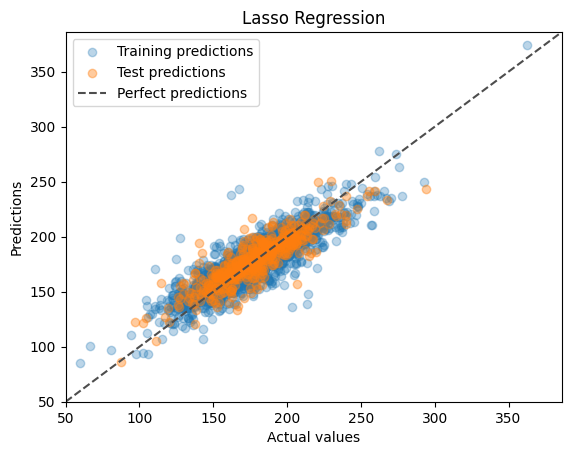

In [28]:
plot_results(X_targets, Y_targets, lasso_model, lasso_predictions, "Lasso Regression", 50, 386)

## Linear regression (Ridge)

Similarly to Lasso, I used `GridSearchCV` to obtain the alpha value. 

```py
# Grid search for best alpha value
ridge_model = GridSearchCV(ridge_model, parameters, scoring='neg_mean_squared_error', cv=10)
```

Again, for the value of alpha, I went from `0.1` to `10` in steps of `0.1`.

```py
# Alpha values to check
parameters = {'alpha': np.arange(0.1, 10, 0.1)}
```

The best value I obtained was `1.4`.

```py
# Best alpha value
ridge_model = ridge_model.best_params_
```

This is a much higher value than Lasso, and so the model will be regularised more. This may not make a difference as I have already removed the features which were not useful. However, I decided to keep it as it was the best estimator produced by `GridSearchCV`.

Other steps were the same as Lasso.

In [29]:
from sklearn.linear_model import Ridge

# Fit ridge regression models to the pre-processed data using the Ridge model.
ridge_model = Ridge(random_state=41, alpha=1.4, max_iter=10000, tol=0.01)
ridge_model.fit(X_train, X_targets)
ridge_predictions = ridge_model.predict(Y_test)

### Evaluating Ridge Model

The metrics are similar to both previous models, but slightly better. Compared with the cross validation scores, again, we can see that the model is not overfitting or underfitting.

The plot is similar to both we have seen but has less variance. The model is very good, the best so far.

In [30]:
ridge_rmse_cv_scores = np.sqrt(-cross_val_score(ridge_model, X_train, X_targets, cv=10, scoring="neg_mean_squared_error"))
print("Ridge RMSE cross validation score:", ridge_rmse_cv_scores.mean())
ridge_rmse_scores = np.sqrt(mean_squared_error(Y_targets, ridge_predictions))
print("Ridge RMSE test score:", ridge_rmse_scores.mean())

ridge_r2_cv_scores = cross_val_score(ridge_model, X_train, X_targets, cv=10, scoring="r2")
print("Ridge R2 cross validation score:", ridge_r2_cv_scores.mean())
ridge_r2_scores = r2_score(Y_targets, ridge_predictions)
print("Ridge R2 test score:", ridge_r2_scores.mean())

Ridge RMSE cross validation score: 13.693223517140272
Ridge RMSE test score: 12.735008615366521
Ridge R2 cross validation score: 0.7526589944167827
Ridge R2 test score: 0.7654195603264751


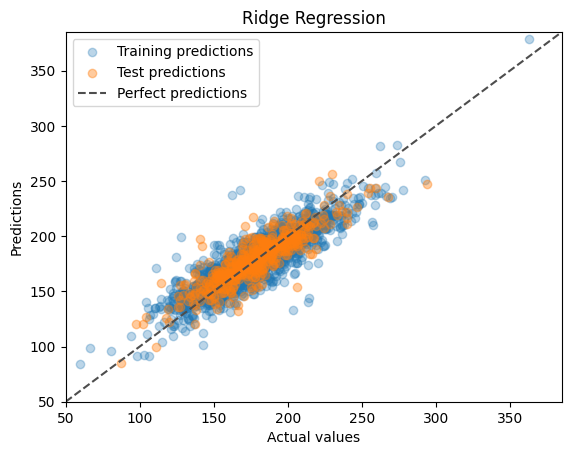

In [31]:
plot_results(X_targets, Y_targets, ridge_model, ridge_predictions, "Ridge Regression", 50, 385)

## Best Performing Model

All three models performed very well, and produced similar metrics. Lasso was slightly worse than the other two but not by much. Nevertheless, the order of models from best to worst is Ridge, OLS, then Lasso. 

This is because Ridge had the lowest RMSE and highest R2 score, followed by OLS (in both metrics) and lastly Lasso. This means that the model is the most accurate and explains the most variance in the target variable. Quantitively, this is the best model.

When we compare to cross validation scores, it appears that Ridge overfit the least whereas OLS overfit the most. This is because the cross validation scores are lower than the metrics. This only makes Ridge even better compared to the others.

The table below shows how we can see the produced values, showing just how similar models were.

In [32]:
# Quantitatively compare your results from all three models
model_scores = pd.DataFrame({
    'RMSE': [lasso_rmse_scores.mean(), ols_rmse_scores.mean(), ridge_rmse_scores.mean()],
    'RMSE CV Diff': [lasso_r2_scores.mean() - lasso_r2_cv_scores.mean(), ols_r2_scores.mean() - ols_r2_cv_scores.mean(), ridge_r2_scores.mean() - ridge_r2_cv_scores.mean()],
    'R2': [lasso_r2_scores.mean(), ols_r2_scores.mean(), ridge_r2_scores.mean()],
    'R2 CV Diff': [lasso_r2_scores.mean() - lasso_r2_cv_scores.mean(), ols_r2_scores.mean() - ols_r2_cv_scores.mean(), ridge_r2_scores.mean() - ridge_r2_cv_scores.mean()]},
    index = ["Lasso", "Linear", "Ridge"]
)
display(model_scores)

,RMSE,RMSE CV Diff,R2,R2 CV Diff
Lasso,12.738194,0.014296,0.765302,0.014296
Linear,12.736063,0.012767,0.765381,0.012767
Ridge,12.735009,0.012761,0.765420,0.012761


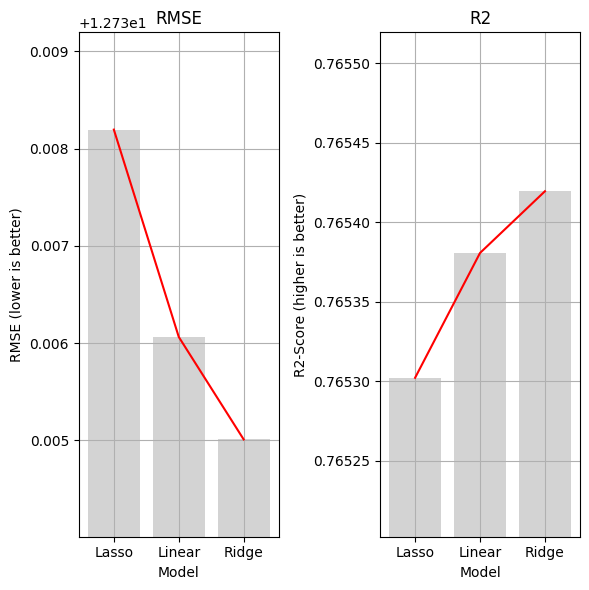

In [33]:
# Plot the predicted targets for against the actual targets
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(6)

ymin, ymax = (18,19)
ax1.bar(model_scores.index, model_scores['RMSE'], color='lightgray')
ax1.plot(model_scores.index, model_scores['RMSE'], color='red')
ax1.set_ylim([min(model_scores['RMSE'])-0.001, max(model_scores['RMSE'])+0.001])
ax1.set_ylabel('RMSE (lower is better)')
ax1.set_xlabel('Model')
ax1.set_title('RMSE')

ax2.bar(model_scores.index, model_scores['R2'],color='lightgray')
ax2.plot(model_scores.index, model_scores['R2'], color='red')
ax2.set_ylim([min(model_scores['R2'])-0.0001, max(model_scores['R2']+0.0001)])
ax2.set_ylabel('R2-Score (higher is better)')
ax2.set_xlabel('Model')
ax2.set_title('R2')

fig.tight_layout()
ax1.grid()
ax2.grid()
plt.show()

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

## Feature Importance

We can use the coefficients of the model to determine the importance of the features. The coefficients are the weights of the features in the model. The higher the absolute value of the coefficient, the more important the feature is. The coefficients are also negative if the feature is negatively correlated with the target variable. This means that as the feature increases, the target variable decreases. The coefficients are positive if the feature is positively correlated with the target variable. This means that as the feature increases, the target variable increases.

The table below shows the features sorted by weight (including negative sign '`-`' for negative weights, to the nearest whole number). We can see the top `5` features are:

| Rank | Feature | Weight |
| -- | -- | -- |
| `1` | `PctPublicCoverage` | `-22.494516` |
| `2` | `deathPerCounty` | `+19.414319` |
| `3` | `PctPublicCoverageAlone` | `+15.763840` |
| `4` | `incidenceRate` | `+8.486314` |
| `5` | `deathRate` | `+6.760070` |

In [34]:
# Get magnitude of weights using lasso regression model with best alpha value
weights = lasso_model.coef_

# Get most relevant features
features_weights = sorted(dict(zip(headings, weights)).items(), key=lambda x: abs(x[1]), reverse=True)

# Create a dataframe with the features and their weights
feature_weights = pd.DataFrame(features_weights, columns=['Feature', 'Weight'])

# Print most relevant features, in descending order of their importance
display(feature_weights)

,Feature,Weight
0,PctPublicCoverage,-22.494516
1,deathPerCounty,19.414319
2,PctPublicCoverageAlone,15.763840
3,incidenceRate,8.486314
4,deathRate,6.760070
5,PctBachDeg25_Over,-5.486573
6,PctWhite,-4.349342
7,PctUnemployed16_Over,3.293282
8,PctEmpPrivCoverage,3.032833
9,PctBlack,-2.892168


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

#### Hyperparameter tuning

I needed to set some values to test for tuning hyperparameters. However, this took a long time so I had to limit the range of values to test. I decided that I could set `max_depth` and `max_features` to `23` as this is the number of features I have selected. I also set `min_samples_leaf` to `4` as this is the minimum number of samples required to be at a leaf node as otherwise we could be overfitting. I also set `random_state` to `41` to ensure reproducibility. The one value I did use to estimate was `n_estimators` as this is the number of trees in the forest. The goal of hyperparameter tuning here was not to create the best model, rather, prevent overfitting.

```py
# Parameter to tune
parameters = {'n_estimators': np.arange(100, 500, 50)}
```

Through `GridSearchCV`, with `10` cross validation folds, this gave the best value as `450`.

## Random Forest

Using the parameters above, I fit the model on the splitted preprocesed training data and predicted on the splitted test data.

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=41, max_depth=23, max_features=23, min_samples_leaf=4, n_jobs=-1)
forest_reg.fit(X_train, np.ravel(X_targets))
forest_predictions = forest_reg.predict(Y_test)

### Evaluation and comparison

In exercise `3` I found that the best performing model was Ridge regression. This is because it had the lowest RMSE and highest R2 score. Using these same metrics, we can compare the Random Forest model to the Ridge model. 

Comparing the metrics quantitively, we can see that the Random Forest model is substantially better than the Ridge model. The RMSE is much lower and the R2 score is much higher. This means that the model is more accurate and explains more variance in the target variable. This is also shown in the plot below. Thus, Random Forest model is the best regression model is the best we have sen so far.

An even easier way to visualise the difference is by compareing the plots. We can see that the predictions made by Random Forest are so much closer to the actual values, with just a difference in RMSE of over `3.5`. The plots show how much better the Random Forest model is - better accuracy and more variance. Note that I have set smaller limits so that we can better capture the variance in points.

In [36]:
forest_rmse_cv_scores = np.sqrt(-cross_val_score(forest_reg, X_train, np.ravel(X_targets), cv=10, scoring="neg_mean_squared_error"))
print("Random Forest RMSE cross validation score:", forest_rmse_cv_scores.mean())
forest_rmse_scores = np.sqrt(mean_squared_error(Y_targets, forest_predictions))
print("Random Forest RMSE test score:", forest_rmse_scores.mean())

forest_r2_cv_scores = cross_val_score(forest_reg, X_train, np.ravel(X_targets), cv=10, scoring="r2")
print("Random Forest R2 cross validation score:", forest_r2_cv_scores.mean())
forest_r2_scores = r2_score(Y_targets, forest_predictions)
print("Random Forest R2 test score:", forest_r2_scores.mean())

Random Forest RMSE cross validation score: 10.68486585127158
Random Forest RMSE test score: 9.212734519257411
Random Forest R2 cross validation score: 0.8488841392308728
Random Forest R2 test score: 0.8772361718647371


In [37]:
# Quantitatively compare your results with best model
model_scores_for = pd.DataFrame({
    'RMSE': [ridge_rmse_scores.mean(), forest_rmse_scores.mean()],
    'R2': [ridge_r2_scores.mean(), forest_r2_scores.mean()]},
    index = ["Ridge", "Random Forest"]
)
display(model_scores_for)

,RMSE,R2
Ridge,12.735009,0.765420
Random Forest,9.212735,0.877236


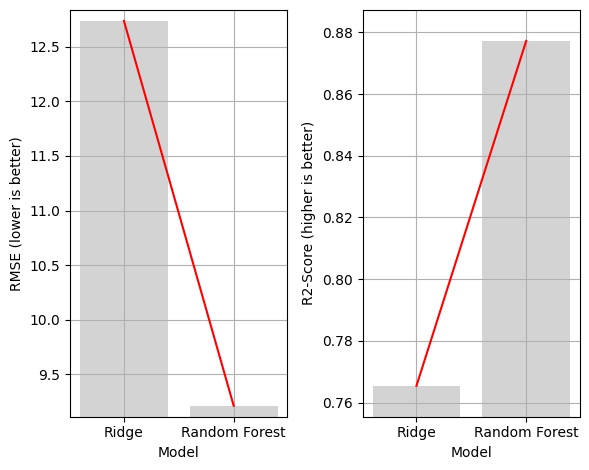

In [38]:
# Plot the predicted targets for against the actual targets
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(6)

ax1.bar(model_scores_for.index, model_scores_for['RMSE'], color='lightgray')
ax1.plot(model_scores_for.index, model_scores_for['RMSE'], color='red')
ax1.set_ylim([min(model_scores_for['RMSE'])-0.1, max(model_scores_for['RMSE'])+0.1])
ax1.set_ylabel('RMSE (lower is better)')
ax1.set_xlabel('Model')

ax2.bar(model_scores_for.index, model_scores_for['R2'],color='lightgray')
ax2.plot(model_scores_for.index, model_scores_for['R2'], color='red')
ax2.set_ylim([min(model_scores_for['R2'])-0.01, max(model_scores_for['R2'])+0.01])
ax2.set_ylabel('R2-Score (higher is better)')
ax2.set_xlabel('Model')

fig.tight_layout()
ax1.grid()
ax2.grid()
plt.show()

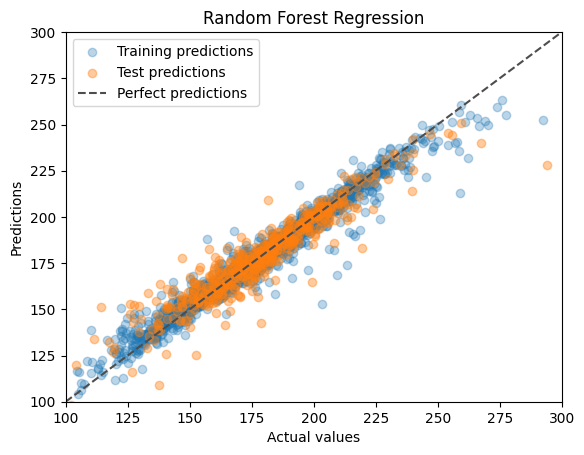

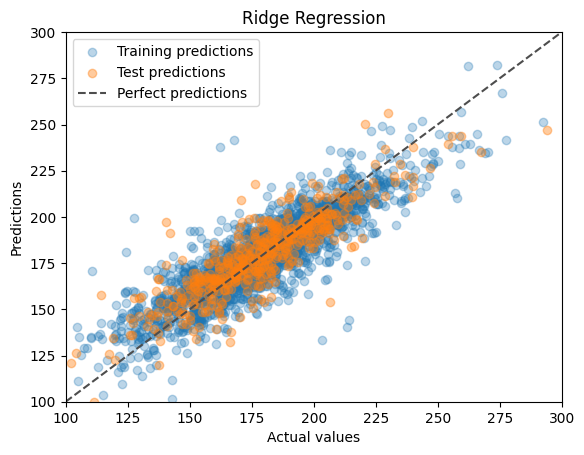

In [39]:
# Random Forest Plot
plot_results(X_targets, Y_targets, forest_reg, forest_predictions, "Random Forest Regression", 100, 300)
# Ridge Plot
plot_results(X_targets, Y_targets, ridge_model, ridge_predictions, "Ridge Regression", 100, 300)

### Features

#### Top five most important/relevant features

For the provided data set and regression task identified using the Random Forest model, we can identify the top five features. The table below shows the features sorted by importance (to `2` decimal places). We can see the top `5` features are:

| RF | Feature | Importance | Lasso | Feature | Weight |
| -- | -- | -- | -- | -- | -- |
| `1` | `deathRate` | `0.432907` | `1` | `PctPublicCoverage` | `-22.494516` |
| `2` | `incidenceRate` | `0.357056` | `2` | `deathPerCounty` | `+19.414319` |
| `3` | `deathPerCounty` | `0.075041` | `3` | `PctPublicCoverageAlone` | `+15.763840` |
| `4` | `PctBachDeg25_Over` | `0.022745` | `4` | `incidenceRate` | `+8.486314` |
| `5` | `PctPublicCoverageAlone` | `0.012750` | `5` | `deathRate` | `+6.760070` |

#### Comparison with features in Lasso

Compared to the features reported in exercise `4`, we can see none of the features are in the same order, however `4` features appear in both lists: `PctPublicCoverageAlone`, `deathRate`, `deathPerCounty` and `incidenceRate`. 

Of these, relatively, Lasso gave `deathRate` and `incidenceRate` a lower importance than Random Forest, but `deathPerCounty` and `PctPublicCoverageAlone` a higher importance than Random Forest. 

The difference was that Lasso reported `PctPublicCoverage` within the top `5` most important features, but Random Forest did not. Random forest reported `PctBachDeg25_Over` within the top `5` most important features (even if it had very low importance scores), but Lasso did not.

When we look deeper, we can also see that in general, Random Forest gives `deathRate` and `incidenceRate` so much importance and not much to anything else. Whereas in Lasso, most features had a decent level of importance, just the top `3` were much higher.

In [40]:
# importance of each feature in Random forest model
importances = forest_reg.feature_importances_

# Get most relevant features
features_weights = sorted(dict(zip(headings, importances)).items(), key=lambda x: x[1], reverse=True)

# Create a dataframe with the features and their weights
feature_weights = pd.DataFrame(features_weights, columns=['Feature', 'Importance'])

# Print most relevant features, in descending order of their importance
display(feature_weights)

,Feature,Importance
0,deathRate,0.432907
1,incidenceRate,0.357056
2,deathPerCounty,0.075041
3,PctBachDeg25_Over,0.022745
4,PctPublicCoverageAlone,0.012750
5,casesPerCounty,0.009826
6,PctUnemployed16_Over,0.009613
7,AvgHouseholdSize,0.009520
8,povertyPercent,0.006616
9,PctBlack,0.006077


# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

#### Chosen Regression Model

From exercise `5`, we know that Random Forest was the best regression model. This is because it had the lowest RMSE and highest R2 score.

The following code is the inference script to predict targets for the unseen test data. It processes the entire training data file as the training set, through the pipeline. It uses the Random Forest regressor using the best parameters found in exercise `5`. It then predicts on the test data. I have outputted the RMSE and R2 scores, plotted actual vs predictions and listed all predictions and the actual values, for evaluation purposes

In [41]:
## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path = 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

# Pre-process all the training data with feature selection
all_train = pipeline_feature_selection.fit_transform(training_data)

# Retrain forest regression model here 
forest_reg_final = RandomForestRegressor(random_state=41, n_estimators=450, max_depth=23, max_features=23, min_samples_leaf=4)
forest_reg_final.fit(all_train, np.ravel(training_targets.values))

# Predict on unseen test data and evaluate your predictions
processed_test_data = pipeline_feature_selection.fit_transform(test_data)
processed_test_targets = test_targets.values
predictions = forest_reg_final.predict(processed_test_data)

# Calculate root mean square error and r2 score
final_rmse = np.sqrt(mean_squared_error(processed_test_targets, predictions))
final_r2 = r2_score(processed_test_targets, predictions)

print("Final RMSE:", final_rmse)
print("Final R2:", final_r2)

Final RMSE: 10.844345427886816
Final R2: 0.844561100672041


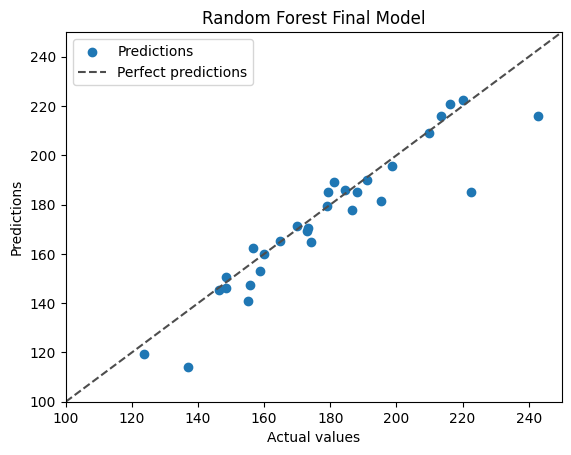

In [42]:
plt.scatter(processed_test_targets, predictions)
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")
plt.title("Random Forest Final Model")
plt.xlim(100, 250)
plt.ylim(100, 250)
plt.xlabel("Actual values")
plt.ylabel("Predictions")
plt.legend(["Predictions", "Perfect predictions"])
plt.show()

In [43]:
display(pd.DataFrame({'Actual': processed_test_targets.flatten(), 'Predicted': predictions.flatten()}))

,Actual,Predicted
0,181.2,189.126881
1,173.4,170.403209
2,148.4,146.281448
3,213.5,215.785935
4,155.2,140.864448
5,220.2,222.591952
6,156.6,162.480559
7,148.6,150.415525
8,172.8,169.121200
9,164.9,165.227644


# Additional Tasks

I wanted to apply other knowledge learnt throughout the course and in my own time to apply to this project. I haven't written much but the code and outputs speak for themselves.

## KMeans clustering

- Without clustering (setting thresholds as even percentiles in the targets), metrics all gave around a `33%` score
- With clustering, metrics all gave around a `76%` score
- By using different number of clusters, I observed that `3` gave the best results
- We can see the centroids given for `Low` (`147`), `Medium` (`181`) and `High` (`216`) values
- We can categorise the training and test targets into `Low`, `Medium` and `High` values

In [44]:
# Clustering to work out bounds of each category
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=4, n_init=100)
kmeans.fit(training_targets)
centroids = sorted(kmeans.cluster_centers_)

# Output the centroids
for i in range(len(centroids)):
    print("Centroid", i+1, ":", round(centroids[i][0]))

# Iterate through X_cat and Y_cat and change value based on cluster label
def categorise_data(data, centroids):
  for i in range(len(data)):
    if data[i] < (centroids[0]+centroids[1])/2:
      data[i] = 0
    elif data[i] < (centroids[1]+centroids[2])/2:
      data[i] = 1
    else:
      data[i] = 2

  return data

X_cat = categorise_data(X_targets.copy().values, centroids)
Y_cat = categorise_data(Y_targets.copy().values, centroids)

Centroid 1 : 147
Centroid 2 : 180
Centroid 3 : 216


## Logistic Regression

The output of the following cell shows the confusion matrix and values for accuracy, precision, recall and the F1 score. We can see that this model is not that bad at predicting classes, however, given the context of the data, one would expect much better results.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Attempt to fit logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=41)
log_reg.fit(X_train, np.ravel(X_cat))

# Predict on test data
log_predictions = log_reg.predict(Y_test)

# Plot confusion matrix
cfm = multilabel_confusion_matrix(Y_cat, log_predictions)
# split into 3
cfm1 = cfm[0]
cfm2 = cfm[1]
cfm3 = cfm[2]

# Create dataframe with TP, FP, FN, TN
cfm_df = pd.DataFrame({'TP': [cfm1[0][0], cfm2[0][0], cfm3[0][0]], 'FP': [cfm1[0][1], cfm2[0][1], cfm3[0][1]], 'FN': [cfm1[1][0], cfm2[1][0], cfm3[1][0]], 'TN': [cfm1[1][1], cfm2[1][1], cfm3[1][1]]}, index=['Low', 'Medium', 'High'])
display(cfm_df)

,TP,FP,FN,TN
Low,333,17,49,89
Medium,157,85,30,216
High,370,14,37,67


In [46]:
# Compute metrics
print(f"Accuracy: {round(100*accuracy_score(Y_cat, log_predictions))}%")
print(f"Precision: {round(100*precision_score(Y_cat, log_predictions, average='weighted'))}%")
print(f"Recall: {round(100*recall_score(Y_cat, log_predictions, average='weighted'))}%")
print(f"F1 Score: {round(100*f1_score(Y_cat, log_predictions, average='weighted'))}%")

Accuracy: 76%
Precision: 78%
Recall: 76%
F1 Score: 76%


## Neural Networks

I did a lot of testing, including extensively testing the number of neurons. In the end, I decided to use `23` input neurons - `1` for each feature. I decided to use the square root of `23` (rounds down to `4`) for the number of hidden layer neurons. This may have been an arbitrary choice but did produce very good results.

Overall, we can see that the neural network produces very good results. Due to different sources of randomisation, I could not find a way to make this reproducible but I found the average score was roughly between `9` and `11`.

In [54]:
# import keras and tensorflow
import tensorflow as tf

# set random seed
tf.random.set_seed(41)

# Build neural network model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(23, activation='relu', input_shape=(all_train.shape[1],)), # 23 input layers, one for each feature
  tf.keras.layers.Dense(4, activation='relu'), # 4 hidden layers (round down sqrt of 23)
  tf.keras.layers.Dense(1) # 1 output layer
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train model
history = model.fit(all_train, np.ravel(training_targets.values), epochs=300, validation_split = 0.2, verbose=0)

# Output predictions
predictions = model.predict(processed_test_data)

# Calculate root mean square error and r2 score
rmse = np.sqrt(mean_squared_error(processed_test_targets, predictions))
r2 = r2_score(processed_test_targets, predictions)

print("RMSE:", rmse)
print("R2-Score:", r2)

1/1 [==============================] - 0s 22ms/step
RMSE: 8.03540410050225
R2-Score: 0.9146568887576161


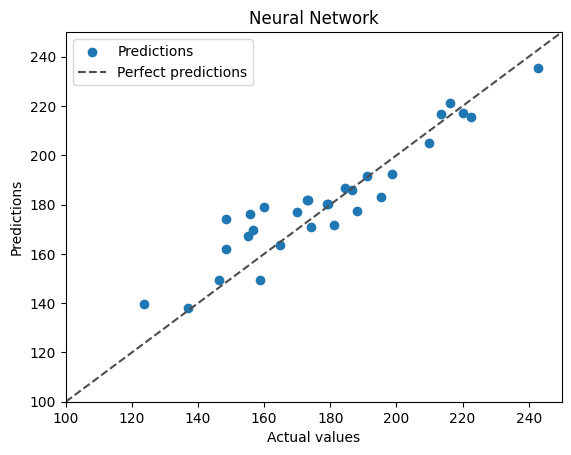

In [48]:
plt.scatter(processed_test_targets, predictions)
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c=".3")
plt.xlim(100, 250)
plt.ylim(100, 250)
plt.title("Neural Network")
plt.xlabel("Actual values")
plt.ylabel("Predictions")
plt.legend(["Predictions", "Perfect predictions"])
plt.show()

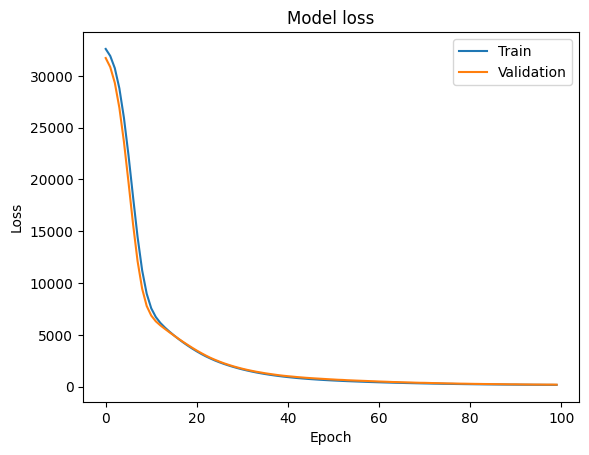

In [49]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [50]:
# Display predictions
display(pd.DataFrame({'Real': processed_test_targets.flatten(), 'Predicted': predictions.flatten()}))

,Real,Predicted
0,181.2,171.546982
1,173.4,181.930176
2,148.4,174.292572
3,213.5,216.919037
4,155.2,167.199753
5,220.2,216.987671
6,156.6,169.609589
7,148.6,161.830048
8,172.8,181.713211
9,164.9,163.695648
